# **Experiment Summary**

**Introduction and Background:** Telomeres are caps of protective DNA at the ends of chromosomes. These caps prevent the loss of the ends of the chromosomes and spontaneous end joining. Telomeres shorten with each cell division, and the loss of DNA sequence eventually leads to cell senescence and death. Short telomeres have been associated with aging and disease; therefore, telomere length may be considered a biomarker for aging. Is there any way to maintain telomere length and what some strategies for slowing the process of telomere shortening? Physical activity has been associated with delayed aging and may serve as a mechanism for maintaining telomere length. As evidence of this hypothesis, longer telomeres have been found in immune cells of people who engage in regular, moderate exercise. Further, exercise has been found to increase the activity of telomerase, an enzyme that maintains telomere length, in mouse myocardium. 


**Hypothesis and Plan:** For this study, I hypothesized that specific factors associated with physical activity and physical fitness would predict telomere length. For example, can VO2 max, a measure of cardiovascular fitness, predict telomere length? What combination of factors are most predictive of telomere length? Determination of such factors could help scientists direct research to understanding specific mechanisms of aging and longevity. It could also help individuals optimize health by prioritizing their efforts to specific, effective behaviors. To test this hypothesis, my general plan was to use supervised machine learning algorithms to determine factors most predictive of telomere length.


**Data:** For this analysis, I used the National Health and Nutrition Examination Survey (NHANES) dataset from the Centers for Disease Control and Prevention (CDC) from the year 1999-2000. Continuous NHANES refers to the survey after 1999, when the survey moved to continuous data collection in two-year cycles. The sample for each two-year cycle is representative of the non-institutionalized, U.S. population. These surveys were designed to assess the health and nutritional status of adults and children in the United States. The survey is unique in that it combines interviews and physical examinations. The NHANES interview data includes demographic, socioeconomic, dietary, and health-related questions. The examination component consists of clinical and physiological measurements, as well as laboratory tests. All data were numerical. The dataset is interesting to me because, as an exercise scientist and molecular biologist, I am interested in specific physical fitness tests and related factors and their relationships to each other that might influence molecular and cellular mechanisms of human health.


Data from ten separate files from the period of 1999-2000 were downloaded in SAS and converted to CSV. I selected columns from tables of most interest to my research question: Demographics, Balance Testing, Cardiovascular Fitness Testing, Muscle (Quad Extension) Strength Testing, Balance Questions (Q), Cardio Health Qs, Current Health Status Qs, Physical Activity Qs, Physical Activity Individual Activities Qs, and Physical Functioning Qs. The tables were merged using Python left join, resulting in 3570 records. During this process, data were scrutinized for removal of duplicate values, nonsense values, and features not relevant to the analysis, such as temperature of the room during tests, size of blood pressure cuffs, and questions specific to presence of congestive heart failure. 


**Methods:** Nulls were prevalent throughout the dataset due to the join; not all participants were tested for all measures. At first, NaN values were replaced with “0” because the researchers developing the dataset had used 0 for missing values. However, models were not performing well, and this strategy was later abandoned. Imputation was considered, but this strategy was not possible due to the nature of the survey questions and tests. Instead, features with over 77% missing data were dropped. Next, remaining features were carefully examined for relevance, and features least relevant to the hypothesis being tested were dropped. Finally, it was discovered that the cardiovascular and muscular fitness tests for this cohort of individuals were incompatible; i.e., these individuals were tested for one or the other, but not both. The decision was made to drop the muscular measures because this method would preserve the most data.


The data were not normally distributed, and because one telomere value was so high and the assumptions of linearity were not being met, the data were capped using winsorization and transformed using Box-Cox initially. Models were tested with and without these adjustments, and based on model performance, a decision was made to use winsorization alone.


Data were split into training and test sets for the analysis, and then models were systematically down selected by the following process. First, multiple machine learning regression models were used to analyze the data using five-fold cross-validation, including Ordinary Least Squares, Ridge, Lasso, ElasticNet, K Nearest Neighbors (KNN), Decision Tree, Random Forest, Support Vector Machine, and Gradient Boosting. After running these models, a subset of features was selected to attempt to optimize model performance. SelectKBest from sklearn and recursive feature selection were used to select the top ten features and reinterrogate the models. Models were compared using the following evaluation metrics: mean absolute error (mae), mean squared error (mse), root mean squared error (rmse), mean absolute percentage error (mape), and average cross validation scores. Finally, the best models were selected for further optimization.


**Results:** The final cleaned dataset was comprised of 154 features, 1837 records, and the target variable, mean telomere length. Because assumptions of linearity were not met (tests indicated heteroscedasticity), the models requiring these assumptions for performance did not fit well and were later abandoned. Use of the full feature set for analysis resulted in models that performed slightly better than the selected feature set, so the entire dataset was used. The training R2 scores for the KNN, Decision Tree, and Random Forest models were the highest, and of these three models, the Random Forest had the lowest error measures. The Random Forest model was selected for further optimization using a grid search to tune the model hyperparameters. No additional improvements could be made using this method. The features most important for making the predictions included: age of participant in months (top two), daily hours of TV/computer use, moderate activity in the last 30 days, muscle strengthening activities in the last 30 days, how long were moderate activities conducted during each bout, and warm up heart rate.


**Discussion, Recommendation, and Future Work:** Based on these results, I concluded that the most important features for the model to make its telomere length predictions were the ages of the participants. This result makes sense because telomeres shorten with age. The physical fitness features were not as important to the model; however, two features did have some impact: daily hours of TV/computer use and how often the participant engaged in moderate physical activities in the last 30 days. These results are interesting because they suggest that people do not need a high level of physical fitness to increase their health and longevity. Rather, moderate intensity activities performed consistently and avoidance of sedentary behaviors may make the most impact. It should be noted that these results include only the features of particular interest to this study. It is probable that diet and other behaviors as well as chronic illnesses may contribute heavily to telomere length and perhaps explain more of the variance in telomere lengths than physical fitness. Further study with an expanded set of features would be interesting. Another point to note is that this study does not explain causation, although the literature suggests that exercise does directly impact telomere length. Based on this analysis, as well as the advice of national organizations, such as the U.S. Department of Health and Human Services and the American College of Sports Medicine, the recommended actions would be to limit sedentary time and engage in regular, moderate activity to increase health and longevity. 


# **Imports and Data as DataFrames**

In [1]:
# Imports
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
import math
from scipy import stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import boxcox

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Uploading to this notebook the CSV files.

from google.colab import files
uploaded = files.upload()

Saving 1999 2000 Balance Questionnaire.csv to 1999 2000 Balance Questionnaire.csv
Saving 1999 2000 Balance.csv to 1999 2000 Balance.csv
Saving 1999 2000 Cardio Fitness.csv to 1999 2000 Cardio Fitness.csv
Saving 1999 2000 Cardio Health Qs.csv to 1999 2000 Cardio Health Qs.csv
Saving 1999 2000 Current Health Status Qs.csv to 1999 2000 Current Health Status Qs.csv
Saving 1999 2000 Demographics.csv to 1999 2000 Demographics.csv
Saving 1999 2000 Physical Activity Qs.csv to 1999 2000 Physical Activity Qs.csv
Saving 1999 2000 Physical Functioning Qs.csv to 1999 2000 Physical Functioning Qs.csv
Saving 1999 2000 Strength.csv to 1999 2000 Strength.csv
Saving 1999 2000 Telomeres.csv to 1999 2000 Telomeres.csv


In [3]:
# Reading the data into dataframes
import io
balanceq_1999 = pd.read_csv(io.BytesIO(uploaded['1999 2000 Balance Questionnaire.csv']))
balance_1999 = pd.read_csv(io.BytesIO(uploaded['1999 2000 Balance.csv']))
cardiofit_1999 = pd.read_csv(io.BytesIO(uploaded['1999 2000 Cardio Fitness.csv']))
cardiohealthq_1999 = pd.read_csv(io.BytesIO(uploaded['1999 2000 Cardio Health Qs.csv']))
currenthealth_1999 = pd.read_csv(io.BytesIO(uploaded['1999 2000 Current Health Status Qs.csv']))
demographics_1999 = pd.read_csv(io.BytesIO(uploaded['1999 2000 Demographics.csv']))
physactq_1999 = pd.read_csv(io.BytesIO(uploaded['1999 2000 Physical Activity Qs.csv']))
physfuncq_1999 = pd.read_csv(io.BytesIO(uploaded['1999 2000 Physical Functioning Qs.csv']))
strength_1999 = pd.read_csv(io.BytesIO(uploaded['1999 2000 Strength.csv']))
telomeres_1999 = pd.read_csv(io.BytesIO(uploaded['1999 2000 Telomeres.csv']))

# **Data Exploration and Cleaning**

In [4]:
# Getting information about the target variable dataframe, telomeres_1999.
telomeres_1999.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3570 entries, 0 to 3569
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      3570 non-null   int64  
 1   TELOMEAN  3570 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 55.9 KB


In [5]:
# How many unique elements are in this table?
telomeres_1999['SEQN'].nunique()

3570

In [6]:
strength_1999['SEQN'].nunique()

2156

In [7]:
# Information about another table. I noticed that for several of the tables, 
# the index column is a float. I will convert these to an integer column below 
# since SEQN are participant numbers and really shouldn't be floats.
strength_1999.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2156 entries, 0 to 2155
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      2156 non-null   int64  
 1   MSAEXLEN  2156 non-null   int64  
 2   MSAEXSTS  2156 non-null   int64  
 3   MSAEXCMT  2156 non-null   int64  
 4   MSDEXCLU  2156 non-null   int64  
 5   MSXWTIME  2156 non-null   float64
 6   MSXWPAIN  2156 non-null   int64  
 7   MSAWDEV   2156 non-null   int64  
 8   MSDPTIME  2156 non-null   float64
 9   MSDPFANG  2156 non-null   float64
 10  MSXARML   2156 non-null   int64  
 11  MSXGRAV   2156 non-null   int64  
 12  MSDPFVEL  2156 non-null   float64
 13  MSDPF     2156 non-null   int64  
 14  MSDNTR    2156 non-null   int64  
 15  MSDAPF    2156 non-null   float64
 16  MSDPFTR   2156 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 286.5 KB


In [8]:
# Converting the SEQN index columns to integers
strength_1999['SEQN'] = strength_1999['SEQN'].astype(int)
physfuncq_1999['SEQN'] = physfuncq_1999['SEQN'].astype(int)
physactq_1999['SEQN'] = physactq_1999['SEQN'].astype(int)
currenthealth_1999['SEQN'] = currenthealth_1999['SEQN'].astype(int)
cardiofit_1999['SEQN'] = cardiofit_1999['SEQN'].astype(int)
balance_1999['SEQN'] = balance_1999['SEQN'].astype(int)

In [9]:
# Checking one df to make sure the column was converted. It was.
strength_1999.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2156 entries, 0 to 2155
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      2156 non-null   int64  
 1   MSAEXLEN  2156 non-null   int64  
 2   MSAEXSTS  2156 non-null   int64  
 3   MSAEXCMT  2156 non-null   int64  
 4   MSDEXCLU  2156 non-null   int64  
 5   MSXWTIME  2156 non-null   float64
 6   MSXWPAIN  2156 non-null   int64  
 7   MSAWDEV   2156 non-null   int64  
 8   MSDPTIME  2156 non-null   float64
 9   MSDPFANG  2156 non-null   float64
 10  MSXARML   2156 non-null   int64  
 11  MSXGRAV   2156 non-null   int64  
 12  MSDPFVEL  2156 non-null   float64
 13  MSDPF     2156 non-null   int64  
 14  MSDNTR    2156 non-null   int64  
 15  MSDAPF    2156 non-null   float64
 16  MSDPFTR   2156 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 286.5 KB


In [10]:
# Combining the telomere and strength dataframes. Keeping all the telomere
# values.

combine_first = telomeres_1999.merge(strength_1999, how='left', on='SEQN')

In [11]:
# A look at the combined file. Many nulls for strength measures.
combine_first.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3570 entries, 0 to 3569
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      3570 non-null   int64  
 1   TELOMEAN  3570 non-null   float64
 2   MSAEXLEN  1733 non-null   float64
 3   MSAEXSTS  1733 non-null   float64
 4   MSAEXCMT  1733 non-null   float64
 5   MSDEXCLU  1733 non-null   float64
 6   MSXWTIME  1733 non-null   float64
 7   MSXWPAIN  1733 non-null   float64
 8   MSAWDEV   1733 non-null   float64
 9   MSDPTIME  1733 non-null   float64
 10  MSDPFANG  1733 non-null   float64
 11  MSXARML   1733 non-null   float64
 12  MSXGRAV   1733 non-null   float64
 13  MSDPFVEL  1733 non-null   float64
 14  MSDPF     1733 non-null   float64
 15  MSDNTR    1733 non-null   float64
 16  MSDAPF    1733 non-null   float64
 17  MSDPFTR   1733 non-null   float64
dtypes: float64(17), int64(1)
memory usage: 529.9 KB


I initially attempted to simply merge all the data together, but the dataset was so large that the code crashed every time. I then tried the following fixes: First, I deleted many columns from the Demographics file because it was very large, and many columns were irrelevant to my interests in this study. I also removed some columns from the Physical Functioning Questionnaire. This feature selection did not work to stop the crashing.

I next decided to merge the tables together pairwise and only on the LEFT JOIN instead of a FULL OUTER JOIN. I realized that the index columns for some of the tables (SEQN columns) were either integers or floats, and I received a warning message about that every time I attempted a merge. I converted these columns to integers in each table to keep it consistent, and these fixes seemed to work.

Finally, I initially was merging these tables incorrectly, resulting in multiple duplicated rows. Below, I have corrected this error and I check each join for the correct expected number of rows.


In [12]:
print(combine_first)

      SEQN  TELOMEAN  MSAEXLEN  MSAEXSTS  ...  MSDPF  MSDNTR  MSDAPF  MSDPFTR
0     1378  9.420415       NaN       NaN  ...    NaN     NaN     NaN      NaN
1     7509  3.315313       NaN       NaN  ...    NaN     NaN     NaN      NaN
2     9095  2.515980       NaN       NaN  ...    NaN     NaN     NaN      NaN
3     9170  2.310322       NaN       NaN  ...    NaN     NaN     NaN      NaN
4     8221  2.225661       NaN       NaN  ...    NaN     NaN     NaN      NaN
...    ...       ...       ...       ...  ...    ...     ...     ...      ...
3565  6445  0.433244     546.0       1.0  ...  417.0     6.0   374.0      6.0
3566  2084  0.389337     655.0       1.0  ...  256.0     6.0   215.7      6.0
3567   884  0.000000       NaN       NaN  ...    NaN     NaN     NaN      NaN
3568  2007  0.000000       NaN       NaN  ...    NaN     NaN     NaN      NaN
3569  6548  0.000000       NaN       NaN  ...    NaN     NaN     NaN      NaN

[3570 rows x 18 columns]


In [13]:
combine_second = combine_first.merge(physfuncq_1999, how='left', on='SEQN')
combine_second.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3570 entries, 0 to 3569
Columns: 102 entries, SEQN to PFQ110
dtypes: float64(17), int64(85)
memory usage: 2.8 MB


In [14]:
# Checking to see that there are 3570 records
combine_first['SEQN'].nunique()

3570

In [15]:
combine_second['SEQN'].nunique()

3570

In [16]:
combine_third = combine_second.merge(physactq_1999, how='left', on='SEQN')

In [17]:
combine_third['SEQN'].nunique()

3570

At this point, I realized that the "Individual Physical Activities" table I had initially been using was introducing replicates. This table documents particular sports activities, and a person could be involved with more than one sport, thus the duplicates. I decided this table was too specific for this analysis, so I did not merge it with the other tables.

I also noticed that there were nonsense entries in multiple tables in the raw data. I deleted those and reimported.

In [18]:
combine_fourth = combine_third.merge(demographics_1999, how='left', on='SEQN')

In [19]:
combine_fourth['SEQN'].nunique()

3570

In [20]:
combine_fifth = combine_fourth.merge(currenthealth_1999, how='left', on='SEQN')

In [21]:
combine_fifth['SEQN'].nunique()

3570

In [22]:
combine_sixth = combine_fifth.merge(cardiohealthq_1999, how='left', on='SEQN')

In [23]:
combine_sixth['SEQN'].nunique()

3570

In [24]:
combine_seventh = combine_sixth.merge(cardiofit_1999, how='left', on='SEQN')

In [25]:
combine_seventh['SEQN'].nunique()

3570

In [26]:
combine_eighth = combine_seventh.merge(balance_1999, how='left', on='SEQN')

In [27]:
combine_eighth['SEQN'].nunique()

3570

In [28]:
dataset = combine_eighth.merge(balanceq_1999, how='left', on='SEQN')

In [29]:
dataset['SEQN'].nunique()

3570

In [30]:
# Ok, I've checked all the joined tables, and it doesn't appear that any
# duplicates are present.
dataset['SEQN'].nunique()

3570

In [31]:
dataset.info()
# Much better! Most of the duplicates have been removed. I will drop the remaining.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3585 entries, 0 to 3584
Columns: 260 entries, SEQN to BAQ100
dtypes: float64(148), int64(112)
memory usage: 7.1 MB


In [32]:
dataset.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3585 entries, 0 to 3584
Data columns (total 260 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      3585 non-null   int64  
 1   TELOMEAN  3585 non-null   float64
 2   MSAEXLEN  1748 non-null   float64
 3   MSAEXSTS  1748 non-null   float64
 4   MSAEXCMT  1748 non-null   float64
 5   MSDEXCLU  1748 non-null   float64
 6   MSXWTIME  1748 non-null   float64
 7   MSXWPAIN  1748 non-null   float64
 8   MSAWDEV   1748 non-null   float64
 9   MSDPTIME  1748 non-null   float64
 10  MSDPFANG  1748 non-null   float64
 11  MSXARML   1748 non-null   float64
 12  MSXGRAV   1748 non-null   float64
 13  MSDPFVEL  1748 non-null   float64
 14  MSDPF     1748 non-null   float64
 15  MSDNTR    1748 non-null   float64
 16  MSDAPF    1748 non-null   float64
 17  MSDPFTR   1748 non-null   float64
 18  PFQ010    3585 non-null   int64  
 19  PFQ015    3585 non-null   int64  
 20  PFQ020    3585 non-null   int

In [33]:
dataset.head(10)

,SEQN,TELOMEAN,MSAEXLEN,MSAEXSTS,MSAEXCMT,MSDEXCLU,MSXWTIME,MSXWPAIN,MSAWDEV,MSDPTIME,MSDPFANG,MSXARML,MSXGRAV,MSDPFVEL,MSDPF,MSDNTR,MSDAPF,MSDPFTR,PFQ010,PFQ015,PFQ020,PFQ030,PFQ048,PFQ050,PFQ055,PFQ059,PFQ060B,PFQ060C,PFQ060D,PFQ060E,PFQ060F,PFQ060G,PFQ060H,PFQ060I,PFQ060J,PFQ060L,PFQ060M,PFQ060N,PFQ060O,PFQ060P,...,BAQ130,BAXPFC11,BAXFTC11,BAXPFC12,BAXFTC12,BAXPFC21,BAXFTC21,BAXPFC22,BAXFTC22,BAXPFC31,BAXFTC31,BAXPFC32,BAXFTC32,BAXPFC41,BAXFTC41,BAXPFC42,BAXFTC42,BAQ010,BAQ020A,BAQ020B,BAQ020C,BAQ030A,BAQ030B,BAQ040,BAQ060A,BAQ060B,BAQ060C,BAQ060D,BAQ060E,BAQ060F,BAQ060G,BAQ060H,BAQ070,BAQ075,BAQ080A,BAQ080B,BAQ080C,BAQ080D,BAQ090,BAQ100
0,1378,9.420415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7509,3.315313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9095,2.515980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9170,2.310322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8221,2.225661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,8296,2.186959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6444,2.186498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8532,2.109059,182.0,2.0,1.0,3.0,6.62,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,2,0,0,2,4,4,4,1,4,4,1,1,1,1,2,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0
8,8911,2.105013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,6133,2.021131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
dataset['TELOMEAN'].describe()

count    3585.000000
mean        0.996914
std         0.297200
min         0.000000
25%         0.808444
50%         0.962624
75%         1.146953
max         9.420415
Name: TELOMEAN, dtype: float64

In [35]:
# Here I am dropping any remaining duplicates that resulted from the joining.
# This process also will drop the repeats of sample SEQN # 1378, which I later 
# noticed had been in the raw data.
dataset_nodupes = dataset.drop_duplicates(subset=['SEQN'], keep='first')

In [36]:
dataset_nodupes.head(10)

,SEQN,TELOMEAN,MSAEXLEN,MSAEXSTS,MSAEXCMT,MSDEXCLU,MSXWTIME,MSXWPAIN,MSAWDEV,MSDPTIME,MSDPFANG,MSXARML,MSXGRAV,MSDPFVEL,MSDPF,MSDNTR,MSDAPF,MSDPFTR,PFQ010,PFQ015,PFQ020,PFQ030,PFQ048,PFQ050,PFQ055,PFQ059,PFQ060B,PFQ060C,PFQ060D,PFQ060E,PFQ060F,PFQ060G,PFQ060H,PFQ060I,PFQ060J,PFQ060L,PFQ060M,PFQ060N,PFQ060O,PFQ060P,...,BAQ130,BAXPFC11,BAXFTC11,BAXPFC12,BAXFTC12,BAXPFC21,BAXFTC21,BAXPFC22,BAXFTC22,BAXPFC31,BAXFTC31,BAXPFC32,BAXFTC32,BAXPFC41,BAXFTC41,BAXPFC42,BAXFTC42,BAQ010,BAQ020A,BAQ020B,BAQ020C,BAQ030A,BAQ030B,BAQ040,BAQ060A,BAQ060B,BAQ060C,BAQ060D,BAQ060E,BAQ060F,BAQ060G,BAQ060H,BAQ070,BAQ075,BAQ080A,BAQ080B,BAQ080C,BAQ080D,BAQ090,BAQ100
0,1378,9.420415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7509,3.315313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9095,2.515980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9170,2.310322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8221,2.225661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,8296,2.186959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6444,2.186498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8532,2.109059,182.0,2.0,1.0,3.0,6.62,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,2,0,0,2,4,4,4,1,4,4,1,1,1,1,2,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0
8,8911,2.105013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,6133,2.021131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
dataset_nodupes.info()
# Looks good now.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3570 entries, 0 to 3584
Columns: 260 entries, SEQN to BAQ100
dtypes: float64(148), int64(112)
memory usage: 7.1 MB


In [38]:
# Descriptive statistics
dataset_nodupes['TELOMEAN'].describe()

count    3570.000000
mean        0.997511
std         0.297681
min         0.000000
25%         0.807346
50%         0.963652
75%         1.148108
max         9.420415
Name: TELOMEAN, dtype: float64

In [39]:
# Dropping three rows that have no values for TELOMEAN (SEQN #s 884, 2007, 6548)
dataset_drop = dataset_nodupes.drop(dataset_nodupes.loc[dataset_nodupes['SEQN']==0].index)

In [40]:
# Next, dropping the index column, SEQN, so it will not impact the results of my
# models.
dataset_no_seqn = dataset_drop.drop('SEQN', 1)
dataset_no_seqn.head()

,TELOMEAN,MSAEXLEN,MSAEXSTS,MSAEXCMT,MSDEXCLU,MSXWTIME,MSXWPAIN,MSAWDEV,MSDPTIME,MSDPFANG,MSXARML,MSXGRAV,MSDPFVEL,MSDPF,MSDNTR,MSDAPF,MSDPFTR,PFQ010,PFQ015,PFQ020,PFQ030,PFQ048,PFQ050,PFQ055,PFQ059,PFQ060B,PFQ060C,PFQ060D,PFQ060E,PFQ060F,PFQ060G,PFQ060H,PFQ060I,PFQ060J,PFQ060L,PFQ060M,PFQ060N,PFQ060O,PFQ060P,PFD067A,...,BAQ130,BAXPFC11,BAXFTC11,BAXPFC12,BAXFTC12,BAXPFC21,BAXFTC21,BAXPFC22,BAXFTC22,BAXPFC31,BAXFTC31,BAXPFC32,BAXFTC32,BAXPFC41,BAXFTC41,BAXPFC42,BAXFTC42,BAQ010,BAQ020A,BAQ020B,BAQ020C,BAQ030A,BAQ030B,BAQ040,BAQ060A,BAQ060B,BAQ060C,BAQ060D,BAQ060E,BAQ060F,BAQ060G,BAQ060H,BAQ070,BAQ075,BAQ080A,BAQ080B,BAQ080C,BAQ080D,BAQ090,BAQ100
0,9.420415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.315313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.515980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.310322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.225661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


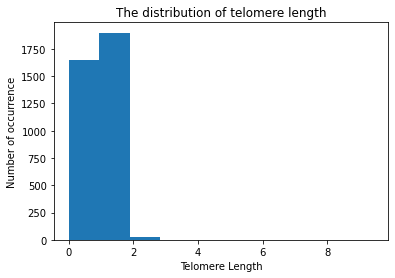

In [41]:
# I will look at the distribution of my raw target variable, TELOMEAN
# Note that telomeres are normalized to reference DNA length as a standard
# practice.
plt.hist(dataset_no_seqn.TELOMEAN)
plt.title("The distribution of telomere length")
plt.xlabel("Telomere Length")
plt.ylabel("Number of occurrence")
plt.show()

# This is an odd distribution, but it is correct according to the raw data file.
# There is one person with telemere length of 9! The next highest value is 3. I
# think this person is probably an outlier based on my reading, but I will leave
# it in because I cannot find documentation stating that it is an error.

In [42]:
# Tests for normality

jb_stats = jarque_bera(dataset_no_seqn['TELOMEAN'])
norm_stats = normaltest(dataset_no_seqn['TELOMEAN'])

print("Jarque-Bera test statistic is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistic is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

# Shows that this distribution is significantly different from normal. I will 
# apply winsorization and Box-Cox transformation below.

Jarque-Bera test statistic is 4857407.676366606 and p value is 0.0
Normality test statistic is 4797.0577254365335 and p value is 0.0


I next had to deal with the nulls because the first model would not run. When I attempted to drop all nulls, it reduced the dataset to nothing. According to the key, it appears that the researchers collecting the data used "0" if data was missing. The nulls in the data resulted from the joining of the tables. Since that was the case, I first tried replacing all NaNs with 0. 

Models were strongly overfitting. I realized that something may be wrong with my data, since even non-linear models were not performing on the test sets. Per discussion with one of the Q&A mentors, we suspected that the issue could be due to my filling of the NaNs with 0 values. He suggested I drop columns with too many null values and impute as appropriate if possible. My new strategy for dealing with the nulls is described below. 

After looking at the raw data, I also noticed that some of the files needed to be cleaned because they had irrelevant features. I went back and cleaned the raw csv files at this point and re-imported - Balance (removed weighting, which was not relevant to this analysis), Telomean (removed standard deviation column), Physical Functioning.

In [43]:
# So many columns have about 50% and over missing data. I will need to drop the
# columns with over 77% missing data. Most of these are balance questions and 
# tests.
total_missing = dataset_no_seqn.isnull().sum().sort_values(ascending=False)
percent_missing = (dataset_no_seqn.isnull().sum()/dataset_no_seqn.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(100)

,Total,Percent
BAXFTC11,2771,0.776190
BAXPFC21,2771,0.776190
BAXFTC41,2771,0.776190
BAXPFC41,2771,0.776190
BAXFTC32,2771,0.776190
...,...,...
CVDS1TIM,1733,0.485434
CVXS1RPE,1733,0.485434
CVDS1HR,1733,0.485434
CVDS1DI,1733,0.485434


In [44]:
# Dropping the columns with more than 77% data missing.
dataset_over_ss = dataset_no_seqn.loc[:, dataset_no_seqn.isnull().mean() < 0.77]

In [45]:
# Now seeing where the data stands. Still many columns with over 50% missing
# data. Unfortunately, many of these are muscle strength and cardiovascular
# measures, so I will need to keep as much of this as I can.

total_missing = dataset_over_ss.isnull().sum().sort_values(ascending=False)
percent_missing = (dataset_over_ss.isnull().sum()/dataset_over_ss.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(100)

,Total,Percent
MSAEXSTS,1837,0.514566
MSXARML,1837,0.514566
MSAEXLEN,1837,0.514566
MSAEXCMT,1837,0.514566
MSDEXCLU,1837,0.514566
...,...,...
BAQ080B,1268,0.355182
BAQ080A,1268,0.355182
BAQ075,1268,0.355182
BAQ070,1268,0.355182


In [46]:
# Looking more closely at the data, I can see that some of the columns are not
# important to this analysis, so I can drop those individually. Examples of the
# types of columns dropped include columns such as blood pressure cuff size,
# room temperature, and other measures not directly associated with my target.
# In addition, I decided to remove the cardiovascular health questions 
# completely because they had a strange coding to them and they were intended
# to determine if a participant had congestive heart failure. These types of
# questions were too specific to that disease and not relevant to this analysis.

dataset_non_sig_removed = dataset_over_ss.drop(['MSXWPAIN', 'MSAEXSTS', 'MSAEXCMT',
                                               'MSDEXCLU', 'MSAWDEV', 'MSXARML',
                                               'MSXGRAV', 'MSDNTR', 'MSDPFTR',
                                               'CVQ220M', 'CVAPROT',
                                               'CVDEXMER', 'CVDPMHR', 'CVDVOMAX',
                                               'CVDEXCMT', 'CVDPROT', 'CVATEMP',
                                               'CVAARM', 'CVACUFF', 'CVAVEST', 
                                               'CVAWS1', 'CVQ220K', 'CVQ220L',
                                               'CVQ220I', 'CVQ220G', 'CVDEXCL6',
                                               'CVDEXCL5', 'CVDEXCL4', 'CVDWTIM',
                                               'CVDEXCL2', 'CVDEXCL1', 'CVDEXSTS',
                                               'CVAWG1', 'CVDR3TIM', 'CVDR2TIM',
                                               'CVDR1TIM', 'CVDWSY', 'CVDWDI',
                                               'CVDS1S', 'CVDS1G', 'CVDS2S',
                                               'CVDS2G', 'CDQ010', 'CDQ020',
                                               'CDQ030', 'CDQ040', 'CDQ050',
                                               'CDQ060', 'CDQ070', 'CDQ080',
                                               'CDQ090'], 1)
dataset_non_sig_removed.head()

,TELOMEAN,MSAEXLEN,MSXWTIME,MSDPTIME,MSDPFANG,MSDPFVEL,MSDPF,MSDAPF,PFQ010,PFQ015,PFQ020,PFQ030,PFQ048,PFQ050,PFQ055,PFQ059,PFQ060B,PFQ060C,PFQ060D,PFQ060E,PFQ060F,PFQ060G,PFQ060H,PFQ060I,PFQ060J,PFQ060L,PFQ060M,PFQ060N,PFQ060O,PFQ060P,PFD067A,PFD067B,PFD067C,PFD067D,PFD067E,PFD069AG,PFD069AQ,PFD069AU,PFD069BG,PFD069BQ,...,CVDS1DI,CVDS2TIM,CVXS2RPE,CVDS2HR,CVDS2SY,CVDS2DI,CVDR1HR,CVDR1SY,CVDR1DI,CVDR2HR,CVDR2SY,CVDR2DI,CVDR3HR,CVDR3SY,CVDR3DI,CVDESVO2,CVDFITLV,BAQ010,BAQ020A,BAQ020B,BAQ020C,BAQ030A,BAQ030B,BAQ040,BAQ060A,BAQ060B,BAQ060C,BAQ060D,BAQ060E,BAQ060F,BAQ060G,BAQ060H,BAQ070,BAQ075,BAQ080A,BAQ080B,BAQ080C,BAQ080D,BAQ090,BAQ100
0,9.420415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,64.0,3.0000,7.0,173.0,184.0,62.0,157.0,158.0,53.0,142.0,162.0,56.0,124.0,154.0,61.0,46.58,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.315313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,43.0,2.9667,19.0,135.0,173.0,70.0,129.0,161.0,64.0,118.0,172.0,77.0,109.0,150.0,88.0,33.46,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.515980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.310322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,45.0,3.0000,10.0,131.0,161.0,52.0,111.0,148.0,57.0,93.0,137.0,66.0,0.0,0.0,0.0,47.87,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.225661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# OK, getting better. There are about 67 columns with some degree of missing
# data at this point.
total_missing = dataset_non_sig_removed.isnull().sum().sort_values(ascending=False)
percent_missing = (dataset_non_sig_removed.isnull().sum()/dataset_non_sig_removed.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(70)

,Total,Percent
MSDAPF,1837,0.514566
MSDPF,1837,0.514566
MSDPFVEL,1837,0.514566
MSDPFANG,1837,0.514566
MSDPTIME,1837,0.514566
...,...,...
SDDSRVYR,1,0.000280
RIAGENDR,1,0.000280
RIDPREG,1,0.000280
RIDAGEMN,1,0.000280


In [48]:
# I'm going to tackle the balance columns next. A lot of these are not of interest.
# Many are descriptions of treatment for balance issues, whereas I simply want to
# know if there were any problems.

dataset_balance_removed = dataset_non_sig_removed.drop(['BAQ030A', 'BAQ030B', 'BAQ040',
                                                        'BAQ060A', 'BAQ060B', 'BAQ060C',
                                                        'BAQ060D', 'BAQ060E', 'BAQ060F',
                                                        'BAQ060G', 'BAQ060H', 'BAQ075',
                                                        'BAQ080A', 'BAQ080B', 'BAQ080C',
                                                        'BAQ080D', 'BAQ090', 'BAQ100'], 1)
dataset_balance_removed.head()

,TELOMEAN,MSAEXLEN,MSXWTIME,MSDPTIME,MSDPFANG,MSDPFVEL,MSDPF,MSDAPF,PFQ010,PFQ015,PFQ020,PFQ030,PFQ048,PFQ050,PFQ055,PFQ059,PFQ060B,PFQ060C,PFQ060D,PFQ060E,PFQ060F,PFQ060G,PFQ060H,PFQ060I,PFQ060J,PFQ060L,PFQ060M,PFQ060N,PFQ060O,PFQ060P,PFD067A,PFD067B,PFD067C,PFD067D,PFD067E,PFD069AG,PFD069AQ,PFD069AU,PFD069BG,PFD069BQ,...,HSQ580,HSQ590,HSAQUEX,CVDEXCL3,CVQ220A,CVQ220B,CVQ220C,CVQ220E,CVQ220H,CVQ220J,CVDEXLEN,CVXPARC,CVXWRPE,CVDWHR,CVDS1TIM,CVXS1RPE,CVDS1HR,CVDS1SY,CVDS1DI,CVDS2TIM,CVXS2RPE,CVDS2HR,CVDS2SY,CVDS2DI,CVDR1HR,CVDR1SY,CVDR1DI,CVDR2HR,CVDR2SY,CVDR2DI,CVDR3HR,CVDR3SY,CVDR3DI,CVDESVO2,CVDFITLV,BAQ010,BAQ020A,BAQ020B,BAQ020C,BAQ070
0,9.420415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.28,7.0,6.0,109.0,3.0,7.0,144.0,136.0,64.0,3.0000,7.0,173.0,184.0,62.0,157.0,158.0,53.0,142.0,162.0,56.0,124.0,154.0,61.0,46.58,3.0,NaN,NaN,NaN,NaN,NaN
1,3.315313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,2,0.0,2.0,2.0,2.0,2.0,2.0,2.0,18.90,1.0,17.0,0.0,3.0,17.0,119.0,164.0,43.0,2.9667,19.0,135.0,173.0,70.0,129.0,161.0,64.0,118.0,172.0,77.0,109.0,150.0,88.0,33.46,2.0,NaN,NaN,NaN,NaN,NaN
2,2.515980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN
3,2.310322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.78,3.0,6.0,92.0,3.0,8.0,113.0,142.0,45.0,3.0000,10.0,131.0,161.0,52.0,111.0,148.0,57.0,93.0,137.0,66.0,0.0,0.0,0.0,47.87,3.0,NaN,NaN,NaN,NaN,NaN
4,2.225661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN


In [49]:
# Getting a final count. There are 49 columns with nulls that I will need to 
# make hard decisions about. I'm going to go through these carefully and decide
# whether to impute or drop.

total_missing = dataset_balance_removed.isnull().sum().sort_values(ascending=False)
percent_missing = (dataset_balance_removed.isnull().sum()/dataset_balance_removed.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(50)

,Total,Percent
MSDPTIME,1837,0.514566
MSDPF,1837,0.514566
MSDPFVEL,1837,0.514566
MSAEXLEN,1837,0.514566
MSDPFANG,1837,0.514566
MSDAPF,1837,0.514566
MSXWTIME,1837,0.514566
CVDEXCL3,1733,0.485434
CVQ220A,1733,0.485434
CVQ220B,1733,0.485434


In [50]:
# How many columns do I have now? Still a good many.
dataset_balance_removed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3570 entries, 0 to 3584
Columns: 167 entries, TELOMEAN to BAQ070
dtypes: float64(56), int64(111)
memory usage: 4.7 MB


In [51]:
# What are the names of the columns? Looks like if I delete any more of the 
# balance questions, I would remove them from the analysis completely. 
for col in dataset_balance_removed.columns: 
    print(col) 

TELOMEAN
MSAEXLEN
MSXWTIME
MSDPTIME
MSDPFANG
MSDPFVEL
MSDPF
MSDAPF
PFQ010
PFQ015
PFQ020
PFQ030
PFQ048
PFQ050
PFQ055
PFQ059
PFQ060B
PFQ060C
PFQ060D
PFQ060E
PFQ060F
PFQ060G
PFQ060H
PFQ060I
PFQ060J
PFQ060L
PFQ060M
PFQ060N
PFQ060O
PFQ060P
PFD067A
PFD067B
PFD067C
PFD067D
PFD067E
PFD069AG
PFD069AQ
PFD069AU
PFD069BG
PFD069BQ
PFD069BU
PFQ069CG
PFQ069CQ
PFQ069CU
PFD069DG
PFD069DQ
PFD069DU
PFQ069EG
PFQ069EQ
PFQ069EU
PFQ069FG
PFQ069FQ
PFQ069FU
PFQ069GG
PFQ069GQ
PFQ069GU
PFQ069HG
PFQ069HQ
PFQ069HU
PFD069IG
PFD069IQ
PFD069IU
PFD069JG
PFD069JQ
PFD069JU
PFQ069KG
PFQ069KQ
PFQ069KU
PFQ069LG
PFQ069LQ
PFQ069LU
PFQ069MG
PFQ069MQ
PFQ069MU
PFQ069NG
PFQ069NQ
PFQ069NU
PFQ069OG
PFQ069OQ
PFQ069OU
PFD069PG
PFD069PQ
PFD069PU
PFD069QG
PFD069QQ
PFD069QU
PFD069RG
PFD069RQ
PFD069RU
PFQ090
PFQ100
PFQ110
PAD020
PAQ050Q
PAQ050U
PAD080
PAQ100
PAD120
PAD160
PAQ180
PAD200
PAD320
PAD440
PAD460
PAQ480
PAQ500
PAQ520
PAQ540
PAQ560
PAD570
PAQ580
PAAQUEX
SDDSRVYR
RIDSTATR
RIDEXMON
RIAGENDR
RIDAGEYR
RIDAGEMN
RIDAGEEX
RIDRETH1
RID

In [52]:
# Tackling the muscle columns first. I can't impute these. The values are just
# too different from one another, although I can exclude the MSAEXLEN column.

dataset_sports_removed = dataset_balance_removed.drop(['MSAEXLEN'], 1)
dataset_sports_removed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3570 entries, 0 to 3584
Columns: 166 entries, TELOMEAN to BAQ070
dtypes: float64(55), int64(111)
memory usage: 4.7 MB


In [53]:
# The variables CVDFITLV and CVDESVO2 are two variables of most interest to me.
# These indicate cardiovascular fitness level. I am wondering what the data
# would look like if I dropped any null values for these two varibles.

# Dropping rows with any NaN in the selected columns only
remove_null_cv = dataset_sports_removed.dropna(how='any', subset=['CVDFITLV', 'CVDESVO2'])
remove_null_cv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1837 entries, 0 to 3584
Columns: 166 entries, TELOMEAN to BAQ070
dtypes: float64(55), int64(111)
memory usage: 2.3 MB


In [54]:
# Here I see that my cardiovascular and strength measurements are incompatible!
# If I drop the cardiovascular nulls, I lose the muscle measures completely as
# well as the balance measures.

total_missing = remove_null_cv.isnull().sum().sort_values(ascending=False)
percent_missing = (remove_null_cv.isnull().sum()/remove_null_cv.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
MSDPF,1837,1.000000
MSDPFANG,1837,1.000000
MSDAPF,1837,1.000000
MSDPFVEL,1837,1.000000
MSXWTIME,1837,1.000000
MSDPTIME,1837,1.000000
BAQ020C,1268,0.690256
BAQ070,1268,0.690256
BAQ010,1268,0.690256
BAQ020A,1268,0.690256


In [55]:
# What if I drop based on muscle measure instead? MSDPF is peak force and one
# of the most important measures of this set.

# Looks like I would lose more data points this way. It gives me 1733 entries
# versus 1837 if I keep the cardiovascular measures like I did above. 

remove_null_ms = dataset_sports_removed.dropna(how='any', subset=['MSDPF'])
remove_null_ms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1733 entries, 7 to 3581
Columns: 166 entries, TELOMEAN to BAQ070
dtypes: float64(55), int64(111)
memory usage: 2.2 MB


In [56]:
# This method would remove all of the cardiovascular measures, which I can't 
# have. I will use the first method, which will mean I drop the strength
# measures, and use the remaining data for the analysis.

total_missing = remove_null_ms.isnull().sum().sort_values(ascending=False)
percent_missing = (remove_null_ms.isnull().sum()/remove_null_ms.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(40)

,Total,Percent
CVDEXCL3,1733,1.000000
CVDS2HR,1733,1.000000
CVDS2TIM,1733,1.000000
CVDS1SY,1733,1.000000
CVDS1HR,1733,1.000000
CVXS1RPE,1733,1.000000
CVDS1TIM,1733,1.000000
CVDWHR,1733,1.000000
CVXWRPE,1733,1.000000
CVXPARC,1733,1.000000


In [57]:
# Final column drop
clean = remove_null_cv.drop(['MSDPF', 'MSDPFANG', 'MSDAPF', 'MSDPFVEL',
                             'MSXWTIME', 'MSDPTIME', 'BAQ020C', 'BAQ070',
                             'BAQ010', 'BAQ020A', 'BAQ020B'], 1)
clean.head()

,TELOMEAN,PFQ010,PFQ015,PFQ020,PFQ030,PFQ048,PFQ050,PFQ055,PFQ059,PFQ060B,PFQ060C,PFQ060D,PFQ060E,PFQ060F,PFQ060G,PFQ060H,PFQ060I,PFQ060J,PFQ060L,PFQ060M,PFQ060N,PFQ060O,PFQ060P,PFD067A,PFD067B,PFD067C,PFD067D,PFD067E,PFD069AG,PFD069AQ,PFD069AU,PFD069BG,PFD069BQ,PFD069BU,PFQ069CG,PFQ069CQ,PFQ069CU,PFD069DG,PFD069DQ,PFD069DU,...,RIDPREG,HSQ500,HSQ510,HSQ520,HSQ570,HSQ580,HSQ590,HSAQUEX,CVDEXCL3,CVQ220A,CVQ220B,CVQ220C,CVQ220E,CVQ220H,CVQ220J,CVDEXLEN,CVXPARC,CVXWRPE,CVDWHR,CVDS1TIM,CVXS1RPE,CVDS1HR,CVDS1SY,CVDS1DI,CVDS2TIM,CVXS2RPE,CVDS2HR,CVDS2SY,CVDS2DI,CVDR1HR,CVDR1SY,CVDR1DI,CVDR2HR,CVDR2SY,CVDR2DI,CVDR3HR,CVDR3SY,CVDR3DI,CVDESVO2,CVDFITLV
0,9.420415,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,2,2,2,2,0,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.28,7.0,6.0,109.0,3.0,7.0,144.0,136.0,64.0,3.0000,7.0,173.0,184.0,62.0,157.0,158.0,53.0,142.0,162.0,56.0,124.0,154.0,61.0,46.58,3.0
1,3.315313,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2.0,2,2,2,2,0,1,2,0.0,2.0,2.0,2.0,2.0,2.0,2.0,18.90,1.0,17.0,0.0,3.0,17.0,119.0,164.0,43.0,2.9667,19.0,135.0,173.0,70.0,129.0,161.0,64.0,118.0,172.0,77.0,109.0,150.0,88.0,33.46,2.0
2,2.515980,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,2,2,2,2,0,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
3,2.310322,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2.0,1,2,2,2,0,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.78,3.0,6.0,92.0,3.0,8.0,113.0,142.0,45.0,3.0000,10.0,131.0,161.0,52.0,111.0,148.0,57.0,93.0,137.0,66.0,0.0,0.0,0.0,47.87,3.0
4,2.225661,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.0,1,2,2,2,0,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0


In [58]:
for col in clean.columns: 
    print(col) 

TELOMEAN
PFQ010
PFQ015
PFQ020
PFQ030
PFQ048
PFQ050
PFQ055
PFQ059
PFQ060B
PFQ060C
PFQ060D
PFQ060E
PFQ060F
PFQ060G
PFQ060H
PFQ060I
PFQ060J
PFQ060L
PFQ060M
PFQ060N
PFQ060O
PFQ060P
PFD067A
PFD067B
PFD067C
PFD067D
PFD067E
PFD069AG
PFD069AQ
PFD069AU
PFD069BG
PFD069BQ
PFD069BU
PFQ069CG
PFQ069CQ
PFQ069CU
PFD069DG
PFD069DQ
PFD069DU
PFQ069EG
PFQ069EQ
PFQ069EU
PFQ069FG
PFQ069FQ
PFQ069FU
PFQ069GG
PFQ069GQ
PFQ069GU
PFQ069HG
PFQ069HQ
PFQ069HU
PFD069IG
PFD069IQ
PFD069IU
PFD069JG
PFD069JQ
PFD069JU
PFQ069KG
PFQ069KQ
PFQ069KU
PFQ069LG
PFQ069LQ
PFQ069LU
PFQ069MG
PFQ069MQ
PFQ069MU
PFQ069NG
PFQ069NQ
PFQ069NU
PFQ069OG
PFQ069OQ
PFQ069OU
PFD069PG
PFD069PQ
PFD069PU
PFD069QG
PFD069QQ
PFD069QU
PFD069RG
PFD069RQ
PFD069RU
PFQ090
PFQ100
PFQ110
PAD020
PAQ050Q
PAQ050U
PAD080
PAQ100
PAD120
PAD160
PAQ180
PAD200
PAD320
PAD440
PAD460
PAQ480
PAQ500
PAQ520
PAQ540
PAQ560
PAD570
PAQ580
PAAQUEX
SDDSRVYR
RIDSTATR
RIDEXMON
RIAGENDR
RIDAGEYR
RIDAGEMN
RIDAGEEX
RIDRETH1
RIDRETH2
RIDEXPRG
RIDPREG
HSQ500
HSQ510
HSQ520
HSQ570
HSQ580


In [59]:
# Getting a count of nulls. Looks good now.
total_missing = clean.isnull().sum().sort_values(ascending=False)
percent_missing = (clean.isnull().sum()/clean.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
CVDFITLV,0,0.0
PFQ069GU,0,0.0
PFD069JG,0,0.0
PFD069IU,0,0.0
PFD069IQ,0,0.0
PFD069IG,0,0.0
PFQ069HU,0,0.0
PFQ069HQ,0,0.0
PFQ069HG,0,0.0
PFQ069GQ,0,0.0


In [60]:
# Checking an integer column to be sure of my unique values.
clean['PFQ069HQ'].unique()

array([ 0, 10,  7])

In [61]:
# Now checking one of the float columns. Also good.
clean['TELOMEAN'].unique()

array([9.42041499, 3.3153134 , 2.51597956, ..., 0.50277072, 0.48841482,
       0.        ])

In [62]:
# Final set used for analysis
clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1837 entries, 0 to 3584
Columns: 155 entries, TELOMEAN to CVDFITLV
dtypes: float64(44), int64(111)
memory usage: 2.2 MB


In [63]:
clean.describe()

,TELOMEAN,PFQ010,PFQ015,PFQ020,PFQ030,PFQ048,PFQ050,PFQ055,PFQ059,PFQ060B,PFQ060C,PFQ060D,PFQ060E,PFQ060F,PFQ060G,PFQ060H,PFQ060I,PFQ060J,PFQ060L,PFQ060M,PFQ060N,PFQ060O,PFQ060P,PFD067A,PFD067B,PFD067C,PFD067D,PFD067E,PFD069AG,PFD069AQ,PFD069AU,PFD069BG,PFD069BQ,PFD069BU,PFQ069CG,PFQ069CQ,PFQ069CU,PFD069DG,PFD069DQ,PFD069DU,...,RIDPREG,HSQ500,HSQ510,HSQ520,HSQ570,HSQ580,HSQ590,HSAQUEX,CVDEXCL3,CVQ220A,CVQ220B,CVQ220C,CVQ220E,CVQ220H,CVQ220J,CVDEXLEN,CVXPARC,CVXWRPE,CVDWHR,CVDS1TIM,CVXS1RPE,CVDS1HR,CVDS1SY,CVDS1DI,CVDS2TIM,CVXS2RPE,CVDS2HR,CVDS2SY,CVDS2DI,CVDR1HR,CVDR1SY,CVDR1DI,CVDR2HR,CVDR2SY,CVDR2DI,CVDR3HR,CVDR3SY,CVDR3DI,CVDESVO2,CVDFITLV
count,1837.000000,1837.0,1837.0,1837.000000,1837.0,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,...,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.0,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000
mean,1.087386,0.0,0.0,0.001089,0.0,1.937942,0.070223,0.104518,1.799129,0.142624,0.142624,0.210125,0.173653,0.170386,0.144801,0.132281,0.154600,0.155144,0.143713,0.218291,0.176919,0.149156,0.137725,1.825803,0.819815,0.468699,0.249864,0.155689,0.020686,0.218291,0.077300,0.044094,0.374524,0.149156,0.000544,0.001089,0.002177,0.020142,0.169298,0.070768,...,0.989113,1.681546,1.804028,1.842678,1.838868,0.578116,1.567774,2.0,0.426238,0.191072,0.207403,0.228634,0.229722,0.215024,0.218835,11.040207,1.548176,5.254763,53.047904,1.599365,6.043005,62.098530,67.832335,30.952096,1.439485,6.218835,65.687534,67.433860,28.158410,65.990746,79.896570,34.463800,58.684268,79.710397,36.126293,36.767011,47.862275,22.332063,18.179118,1.044094
std,0.329323,0.0,0.0,0.046663,0.0,0.245798,0.341359,0.427750,0.572080,0.484303,0.509513,0.655499,0.558946,0.528939,0.446167,0.388321,0.474912,0.473010,0.437897,0.705358,0.562780,0.459190,0.413653,7.206503,4.037768,3.145306,2.381427,1.948335,0.146145,2.016742,0.547834,0.287189,2.411656,0.752313,0.023332,0.046663,0.093327,0.148072,1.980893,0.524353,...,0.943901,0.572949,0.548046,0.524734,0.582191,5.348225,1.219131,0.0,0.784954,0.552245,0.589477,0.633993,0.636172,0.605919,0.613940,9.483080,1.979881,4.908685,54.626818,1.478989,6.055373,61.074775,78.586014,36.184830,1.477104,6.884039,71.436515,84.837629,35.782377,66.985873,81.986616,35.782742,58.286260,79.913890,36.434983,54.693164,72.074392,33.844105,21.097796,1.255365
min,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.897950,0.0,0.0,0.000000,0.0,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [64]:
# Getting correlation coefficients to see potential features of most interest
# in case I want to do some selection later. Immediately, it looks like a few of
# the age measures correlate the most with telomere length, although not 
# strongly.

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

numeric_columns = clean.select_dtypes(['int64', 'float64']).columns
np.abs(clean[numeric_columns].iloc[:,0:].corr().loc[:,"TELOMEAN"]).sort_values(ascending=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  if __name__ == '__main__':


TELOMEAN    1.000000
RIDEXMON    0.173886
RIDAGEYR    0.145867
RIDAGEMN    0.144464
RIDAGEEX    0.138181
RIDRETH1    0.085531
PAQ540      0.078463
CVDEXCL3    0.073575
PAD080      0.070508
CVDESVO2    0.069555
PFQ060J     0.069304
PFQ060I     0.068432
PFQ060L     0.067907
PFQ060M     0.066582
PFQ060N     0.066427
CVDS2SY     0.065242
CVDFITLV    0.065193
PFQ060D     0.063964
PFQ050      0.063585
CVXPARC     0.061475
PFQ059      0.060089
CVDS2HR     0.059095
PFQ060H     0.058628
PFQ048      0.056521
PFQ060F     0.056520
PFQ060P     0.056047
PFQ060G     0.055507
CVDS1SY     0.054163
CVDR1SY     0.053191
PFQ055      0.053091
CVDR1HR     0.052985
PFD069AQ    0.052456
PFD069AG    0.050885
PAQ050Q     0.050238
PFQ060O     0.048665
PFD069AU    0.048106
CVDS2TIM    0.048071
PFD067D     0.048068
CVDS1HR     0.047755
CVDR2SY     0.046987
CVDEXLEN    0.046938
PFD067A     0.046561
PFQ060B     0.046367
PFQ060E     0.045668
PFD067E     0.044510
CVDR2HR     0.043603
HSQ570      0.043314
PFD069BQ    0

In [65]:
# I will winsorize the data to cap the outliers, 1% on each end.
from scipy.stats.mstats import winsorize

clean['winsorized_TELOMEAN'] = winsorize(clean['TELOMEAN'], (0.01, 0.01), inplace=False)

Text(0.5, 1.0, 'Box plot of winsorized TELOMEAN')

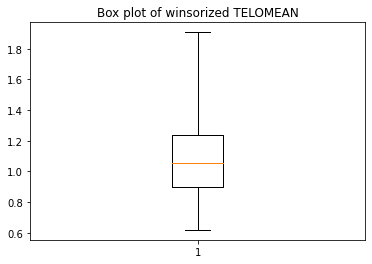

In [66]:
# Plotting these values to check that the outliers have been taken care of.
plt.boxplot(clean['winsorized_TELOMEAN'], whis = 5)
plt.title("Box plot of winsorized TELOMEAN")


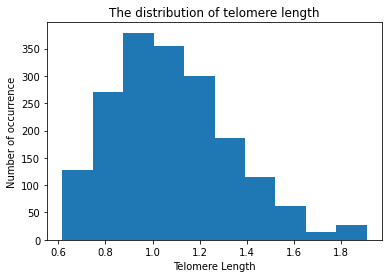

In [67]:
# Checking the distribution of target variable after winsorization. It looks
# much better, but the data are skewed to the right.
plt.hist(clean.winsorized_TELOMEAN)
plt.title("The distribution of telomere length")
plt.xlabel("Telomere Length")
plt.ylabel("Number of occurrence")
plt.show()

In [68]:
# Tests for normality

jb_stats = jarque_bera(clean['winsorized_TELOMEAN'])
norm_stats = normaltest(clean['winsorized_TELOMEAN'])

print("Jarque-Bera test statistic is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistic is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

# Shows that this distribution is still significantly different from normal
# after the winsorization. I will still plan to apply a Box-Cox transformation.

Jarque-Bera test statistic is 155.47500594038695 and p value is 0.0
Normality test statistic is 128.30099582350988 and p value is 1.3797256734846675e-28


In [69]:
# Dropping the original TELOMEAN column so it will not interfere with models.
dataset_final = clean.drop('TELOMEAN', 1)
dataset_final.head()

,PFQ010,PFQ015,PFQ020,PFQ030,PFQ048,PFQ050,PFQ055,PFQ059,PFQ060B,PFQ060C,PFQ060D,PFQ060E,PFQ060F,PFQ060G,PFQ060H,PFQ060I,PFQ060J,PFQ060L,PFQ060M,PFQ060N,PFQ060O,PFQ060P,PFD067A,PFD067B,PFD067C,PFD067D,PFD067E,PFD069AG,PFD069AQ,PFD069AU,PFD069BG,PFD069BQ,PFD069BU,PFQ069CG,PFQ069CQ,PFQ069CU,PFD069DG,PFD069DQ,PFD069DU,PFQ069EG,PFQ069EQ,PFQ069EU,PFQ069FG,PFQ069FQ,PFQ069FU,PFQ069GG,PFQ069GQ,PFQ069GU,PFQ069HG,PFQ069HQ,PFQ069HU,PFD069IG,PFD069IQ,PFD069IU,PFD069JG,PFD069JQ,PFD069JU,PFQ069KG,PFQ069KQ,PFQ069KU,PFQ069LG,PFQ069LQ,PFQ069LU,PFQ069MG,PFQ069MQ,PFQ069MU,PFQ069NG,PFQ069NQ,PFQ069NU,PFQ069OG,PFQ069OQ,PFQ069OU,PFD069PG,PFD069PQ,PFD069PU,PFD069QG,PFD069QQ,PFD069QU,PFD069RG,PFD069RQ,PFD069RU,PFQ090,PFQ100,PFQ110,PAD020,PAQ050Q,PAQ050U,PAD080,PAQ100,PAD120,PAD160,PAQ180,PAD200,PAD320,PAD440,PAD460,PAQ480,PAQ500,PAQ520,PAQ540,PAQ560,PAD570,PAQ580,PAAQUEX,SDDSRVYR,RIDSTATR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,RIDRETH2,RIDEXPRG,RIDPREG,HSQ500,HSQ510,HSQ520,HSQ570,HSQ580,HSQ590,HSAQUEX,CVDEXCL3,CVQ220A,CVQ220B,CVQ220C,CVQ220E,CVQ220H,CVQ220J,CVDEXLEN,CVXPARC,CVXWRPE,CVDWHR,CVDS1TIM,CVXS1RPE,CVDS1HR,CVDS1SY,CVDS1DI,CVDS2TIM,CVXS2RPE,CVDS2HR,CVDS2SY,CVDS2DI,CVDR1HR,CVDR1SY,CVDR1DI,CVDR2HR,CVDR2SY,CVDR2DI,CVDR3HR,CVDR3SY,CVDR3DI,CVDESVO2,CVDFITLV,winsorized_TELOMEAN
0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,0,0,0,2,0,0,2,2,2,2,0,3,3,1,0,0,0,0,1,1.0,2.0,1.0,1.0,28.0,347.0,347.0,1.0,3.0,0.0,0.0,2,2,2,2,0,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.28,7.0,6.0,109.0,3.0,7.0,144.0,136.0,64.0,3.0000,7.0,173.0,184.0,62.0,157.0,158.0,53.0,142.0,162.0,56.0,124.0,154.0,61.0,46.58,3.0,1.908355
1,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,0,0,0,2,0,0,1,2,2,2,0,4,3,3,3,0,0,0,1,1.0,2.0,2.0,2.0,32.0,394.0,396.0,4.0,2.0,2.0,2.0,2,2,2,2,0,1,2,0.0,2.0,2.0,2.0,2.0,2.0,2.0,18.90,1.0,17.0,0.0,3.0,17.0,119.0,164.0,43.0,2.9667,19.0,135.0,173.0,70.0,129.0,161.0,64.0,118.0,172.0,77.0,109.0,150.0,88.0,33.46,2.0,1.908355
2,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,1,30,3,480,1,4,120,2,2,2,2,0,2,3,1,2,0,0,0,1,1.0,2.0,2.0,1.0,38.0,464.0,465.0,3.0,1.0,0.0,0.0,2,2,2,2,0,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.908355
3,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,1,7,2,120,2,0,0,3,1,1,1,17,3,3,1,0,0,0,0,1,1.0,2.0,2.0,2.0,25.0,302.0,302.0,4.0,2.0,2.0,2.0,1,2,2,2,0,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.78,3.0,6.0,92.0,3.0,8.0,113.0,142.0,45.0,3.0000,10.0,131.0,161.0,52.0,111.0,148.0,57.0,93.0,137.0,66.0,0.0,0.0,0.0,47.87,3.0,1.908355
4,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,1,2,3,40,1,6,120,1,1,2,2,0,1,3,1,2,0,0,0,1,1.0,2.0,2.0,2.0,32.0,390.0,391.0,3.0,1.0,1.0,1.0,1,2,2,2,0,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.908355


# **Preparing the Dataset for Modeling**

In [70]:
# Identifying the feature set (X) and target (y) variables for modeling. I'm
# going to use the entire feature set at first.
X = dataset_final.drop(['winsorized_TELOMEAN'], axis=1)
y = dataset_final['winsorized_TELOMEAN']

In [71]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("The number of observations in the training set is {}".format(X_train.shape[0]))
print("The number of observations in the test set is {}".format(X_test.shape[0]))

The number of observations in the training set is 1469
The number of observations in the test set is 368


# **Feature Selection**

In [72]:
# Using kbest from scikit learn to select the best features for the model.
# However, I think this method needs a caveat because it is based on regression,
# and I already know that there is heteroscedasticity in my linear models.

from sklearn.feature_selection import SelectKBest, chi2, f_regression
selections = SelectKBest(score_func=f_regression,k=10).fit_transform(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_e

In [73]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

print(selections)

[[  0.   0.   0.   2.   2.  48. 584. 585.   4.   0.]
 [  0.   0.   0.   0.   2.  28. 346. 347.   3.   0.]
 [  0.   0.   0.   3.   1.  39. 477. 477.   2.   0.]
 [  0.   0.   0.   0.   2.  22. 273. 273.   3.   0.]
 [  0.   0.   0.   0.   1.  21. 262. 264.   1.   0.]
 [  0.   0.   0.   3.   2.  33. 403. 405.   1.   2.]
 [  0.   0.   0.   3.   1.  46. 558. 558.   3.   0.]
 [  0.   0.   0.   0.   2.  28. 336. 338.   3.   0.]
 [  0.   0.   0.   2.   1.  33. 397. 399.   4.   0.]
 [  0.   0.   0.   0.   2.  23. 276. 276.   3.   0.]
 [  0.   0.   0.   1.   2.  31. 380. 381.   4.   0.]
 [  0.   0.   0.   3.   1.  42. 509. 509.   4.   2.]
 [  0.   0.   0.   2.   2.  39. 479. 479.   3.   0.]
 [  0.   0.   0.   2.   2.  40. 488. 489.   3.   1.]
 [  0.   0.   0.   0.   2.  29. 355. 355.   3.   0.]
 [  0.   0.   0.   2.   1.  38. 462. 462.   4.   2.]
 [  0.   0.   0.   2.   2.  33. 407. 408.   4.   0.]
 [  0.   0.   0.   2.   2.  32. 386. 388.   3.   0.]
 [  0.   0.   0.   2.   1.  30. 363. 364.   3.

In [74]:
X_train.head()

# Unfortunately, because of the encoding, it is difficult to pick out the most
# important features using this method. However, several are clear:
# RIDAGEYR, RIDAGEMN, RIDAGEEX, RIDRETH1. I will ensure that these are selected. 

,PFQ010,PFQ015,PFQ020,PFQ030,PFQ048,PFQ050,PFQ055,PFQ059,PFQ060B,PFQ060C,PFQ060D,PFQ060E,PFQ060F,PFQ060G,PFQ060H,PFQ060I,PFQ060J,PFQ060L,PFQ060M,PFQ060N,PFQ060O,PFQ060P,PFD067A,PFD067B,PFD067C,PFD067D,PFD067E,PFD069AG,PFD069AQ,PFD069AU,PFD069BG,PFD069BQ,PFD069BU,PFQ069CG,PFQ069CQ,PFQ069CU,PFD069DG,PFD069DQ,PFD069DU,PFQ069EG,PFQ069EQ,PFQ069EU,PFQ069FG,PFQ069FQ,PFQ069FU,PFQ069GG,PFQ069GQ,PFQ069GU,PFQ069HG,PFQ069HQ,PFQ069HU,PFD069IG,PFD069IQ,PFD069IU,PFD069JG,PFD069JQ,PFD069JU,PFQ069KG,PFQ069KQ,PFQ069KU,PFQ069LG,PFQ069LQ,PFQ069LU,PFQ069MG,PFQ069MQ,PFQ069MU,PFQ069NG,PFQ069NQ,PFQ069NU,PFQ069OG,PFQ069OQ,PFQ069OU,PFD069PG,PFD069PQ,PFD069PU,PFD069QG,PFD069QQ,PFD069QU,PFD069RG,PFD069RQ,PFD069RU,PFQ090,PFQ100,PFQ110,PAD020,PAQ050Q,PAQ050U,PAD080,PAQ100,PAD120,PAD160,PAQ180,PAD200,PAD320,PAD440,PAD460,PAQ480,PAQ500,PAQ520,PAQ540,PAQ560,PAD570,PAQ580,PAAQUEX,SDDSRVYR,RIDSTATR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,RIDRETH2,RIDEXPRG,RIDPREG,HSQ500,HSQ510,HSQ520,HSQ570,HSQ580,HSQ590,HSAQUEX,CVDEXCL3,CVQ220A,CVQ220B,CVQ220C,CVQ220E,CVQ220H,CVQ220J,CVDEXLEN,CVXPARC,CVXWRPE,CVDWHR,CVDS1TIM,CVXS1RPE,CVDS1HR,CVDS1SY,CVDS1DI,CVDS2TIM,CVXS2RPE,CVDS2HR,CVDS2SY,CVDS2DI,CVDR1HR,CVDR1SY,CVDR1DI,CVDR2HR,CVDR2SY,CVDR2DI,CVDR3HR,CVDR3SY,CVDR3DI,CVDESVO2,CVDFITLV
303,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,0,0,0,1,1,15,2,2,2,2,0,3,2,2,2,0,0,0,1,1.0,2.0,2.0,2.0,48.0,584.0,585.0,4.0,2.0,2.0,2.0,2,2,2,2,0,2,2,0.0,2.0,2.0,2.0,2.0,1.0,2.0,19.38,2.0,9.0,101.0,3.0,13.0,102.0,223.0,78.0,1.05,0.0,0.0,0.0,0.0,105.0,219.0,76.0,107.0,225.0,77.0,0.0,0.0,0.0,0.00,0.0
727,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,1,2,1,5,1,4,180,2,1,2,2,0,3,1,1,0,0,0,0,1,1.0,2.0,2.0,1.0,28.0,346.0,347.0,3.0,1.0,0.0,0.0,2,2,2,2,0,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.12,0.0,6.0,92.0,3.0,13.0,123.0,149.0,87.0,3.00,15.0,167.0,168.0,72.0,154.0,155.0,59.0,121.0,153.0,56.0,109.0,162.0,70.0,41.53,2.0
2269,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,0,0,0,1,4,180,2,2,2,2,0,0,1,1,3,0,0,0,1,1.0,2.0,1.0,1.0,39.0,477.0,477.0,2.0,5.0,0.0,0.0,1,2,2,2,0,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.37,3.0,11.0,113.0,3.0,15.0,127.0,157.0,65.0,3.00,17.0,144.0,170.0,55.0,136.0,159.0,52.0,112.0,149.0,49.0,101.0,146.0,52.0,49.03,3.0
629,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,0,0,0,2,0,0,2,2,2,2,0,1,3,1,0,0,0,0,1,1.0,2.0,2.0,1.0,22.0,273.0,273.0,3.0,1.0,0.0,0.0,2,2,2,2,0,2,2,0.0,1.0,2.0,2.0,2.0,2.0,2.0,19.07,2.0,11.0,109.0,3.0,13.0,137.0,166.0,71.0,1.05,0.0,0.0,0.0,0.0,141.0,149.0,76.0,101.0,141.0,71.0,0.0,0.0,0.0,0.00,0.0
711,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,0,0,0,2,0,0,1,2,2,2,0,3,3,1,0,0,0,0,1,1.0,2.0,1.0,2.0,21.0,262.0,264.0,1.0,3.0,1.0,1.0,1,2,2,2,0,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0


In [75]:
# I am going to try recursive feature selection as well because I can use a 
# nonlinear model here.

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rfe = RFE(rf, 10)
fit = rfe.fit(X_train, y_train)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

# The most important features according to this model are: PAD120, PAD160,
# PAQ480, RIDAGEMN, RIDAGEEX, RIDRETH1, CVDEXLEN, CVDR1DI, CVDR2SY, CVDESVO2.

Num Features: 10
Selected Features: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False  True False False False False False False
  True False False False False False False False False False False False
 False  True  True False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False False False False False False
  True False False  True  True False False False  True False]
Feature Ranking: [145 144 

# **Model Selection**

**OLS Linear Regression** using full feature set

In [76]:
from sklearn.linear_model import LinearRegression

# Note: sklearn automatically adds the constant, but stats model does not. 

# Step 1: Instantiating the model
lr = LinearRegression()

# Step 2: Fitting the model to the training set
lr.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
# OLS model in statmodel to get a table of results

# Manually adding constant 
X_sm_train = sm.add_constant(X_train)

# Fitting model
sm_OLS_results = sm.OLS(y_train, X_sm_train).fit()

print(sm_OLS_results.summary())


# Adjusted R squared is 0.122. The F-statistic has a significant p value.
# There are significant features.

                             OLS Regression Results                            
Dep. Variable:     winsorized_TELOMEAN   R-squared:                       0.200
Model:                             OLS   Adj. R-squared:                  0.122
Method:                  Least Squares   F-statistic:                     2.558
Date:                 Wed, 14 Oct 2020   Prob (F-statistic):           6.11e-17
Time:                         21:10:52   Log-Likelihood:                 83.210
No. Observations:                 1469   AIC:                             97.58
Df Residuals:                     1337   BIC:                             796.2
Df Model:                          131                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PFQ010      1.591e-12   1.43e-12      1.10

In [78]:
# Step 3: Making predictions using the test set.
y_pred_lr = lr.predict(X_test)

y_pred_lr

array([0.90053138, 1.05034476, 1.10587445, 0.85968882, 1.23310139,
       1.11407232, 1.05482472, 1.23695681, 1.20663722, 0.95085001,
       1.00361291, 0.95099112, 1.06007127, 0.92787766, 0.53657601,
       0.91141079, 0.84052091, 1.07894299, 1.22620933, 1.08136734,
       1.18125153, 1.36414787, 0.96611596, 1.16071004, 1.02128211,
       1.03795061, 1.07760093, 0.93721345, 1.07006843, 1.11077065,
       1.17227095, 1.19084042, 0.9836246 , 1.04445939, 1.04428777,
       1.15491141, 1.15139421, 0.86347131, 1.13019304, 1.05742695,
       1.18430055, 0.99281818, 0.98279144, 0.67325912, 1.10389208,
       1.09451997, 1.09771002, 1.30881365, 0.86724052, 1.13401431,
       1.10716783, 0.95397877, 1.03418798, 1.17638026, 1.08484466,
       0.92855619, 1.30442731, 1.11212351, 1.27014934, 1.15231904,
       1.1817978 , 0.99881594, 1.0435556 , 1.12376423, 1.0948686 ,
       1.05885263, 1.06155276, 1.20939713, 1.35103938, 1.23772872,
       0.75398089, 1.06573298, 1.22422327, 0.9580582 , 1.15625

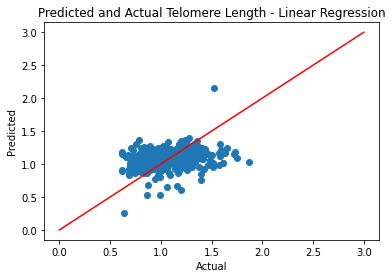

In [79]:
# Plotting predicted values versus actual values
plt.scatter(y_test, y_pred_lr)
plt.plot([0,3], [0,3], linestyle='-', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted and Actual Telomere Length - Linear Regression');

# Not a great fit.

In [81]:
# Step 4: Getting some metrics here
print('Evaluating the OLS Linear Regression Model')

# Setting up variables for later comparison
lr_r2_train = lr.score(X_train, y_train)
lr_r2_test = lr.score(X_test, y_test)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_mse = mse(y_test, y_pred_lr)
lr_rmse = rmse(y_test, y_pred_lr)
lr_mape = np.mean(np.abs((y_test - y_pred_lr) / y_test) * 100)
lr_test_score = cross_val_score(lr, X_test, y_test, cv=5)

# Printing metrics
print("R-squared of the model on the training set is: {}".format(lr_r2_train))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(lr_r2_test))
print("Mean absolute error of the prediction is: {}".format(lr_mae))
print("Mean squared error of the prediction is: {}".format(lr_mse))
print("Root mean squared error of the prediction is: {}".format(lr_rmse))
print("Mean absolute percentage error of the prediction is: {}".format(lr_mape))
print("The test set cross validation scores are: {}".format(lr_test_score))

# This model is not fitting well (low training R squared). Mean error is 19%.

Evaluating the OLS Linear Regression Model
R-squared of the model on the training set is: 0.20042035459780128
-----Test set statistics-----
R-squared of the model on the test set is: -0.04678988498498304
Mean absolute error of the prediction is: 0.19509861131201775
Mean squared error of the prediction is: 0.060281978745711354
Root mean squared error of the prediction is: 0.24552388630377972
Mean absolute percentage error of the prediction is: 19.135287681217047
The test set cross validation scores are: [ -1.65538688  -2.25533131  -0.22425104 -35.28614768  -0.29733795]


In [82]:
# Interpreting how the model is making predictions
# Linear regression models give the coefficients (m), and intercept (b); however,
# I do not know if these can be accurate given that the assumptions of linearity
# were not met (see below). 

coefs = pd.DataFrame(zip(X_test.columns, lr.coef_), 
                     columns=['Feature Names', 'Coefficients'])
print('Intercept: ', lr.intercept_)
coefs.sort_values('Coefficients', ascending=False)

Intercept:  1.4338637926056292


,Feature Names,Coefficients
69,PFQ069OG,7.419369e+00
44,PFQ069FU,1.221406e+00
50,PFQ069HU,4.893335e-01
75,PFD069QG,1.553268e-01
45,PFQ069GG,1.411367e-01
114,RIDPREG,1.246463e-01
48,PFQ069HG,1.223334e-01
125,CVQ220C,1.204942e-01
127,CVQ220H,1.195253e-01
106,RIDEXMON,1.175765e-01


In [83]:
# Checking for assumptions of linearity

# Assumption one: linearity of the model in its coefficients - OLS is already
# meeting that assumption.

# Assumption two: the error term should be zero on average. Again, adding the 
# error term in the model will take care of this assumption. This assumption is
# met.
errors = y_test - y_pred_lr

print("Mean of the errors in the model is: {}".format(np.mean(errors)))

Mean of the errors in the model is: -0.0038088410009262945


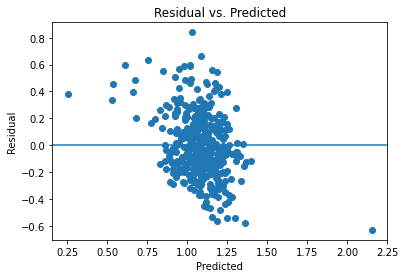

In [84]:
# Assumption three: homoscedasticity. (Distribution of errors is consistent for
# all predicted values.) Not sure about this and will do further tests below.

plt.scatter(y_pred_lr, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

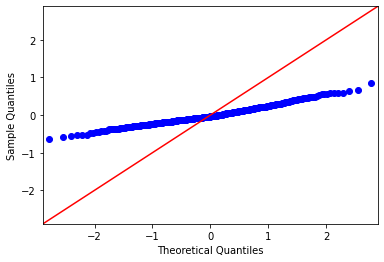

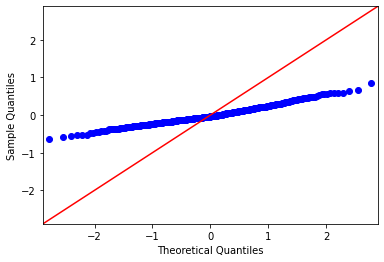

In [85]:
# Checking the assumption with a Q-Q plot. No, this plot does not look good.
sm.qqplot(errors, line='45')

In [86]:
# Running the stats to be sure.

from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(y_pred_lr, errors)
lev_stats = levene(y_pred_lr, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

# p is less than 0.05, so the test is significant. The null is that the errors
# are homoscedastic. We can reject the null, so that means the errors are
# heteroscedastic. 

Bartlett test statistic value is 95.4352 and p value is 1.53e-22
Levene test statistic value is 87.7555 and p value is 8.91e-20


**OTHER LINEAR MODELS** using full dataset

I will test other linear models; however, I will likely abandon the linear models because they do not meet the assumptions of linearity. 

In [87]:
# Ridge Regression
from sklearn.linear_model import RidgeCV

# Fitting ridge regression model. Alpha (lambda) is the regularization parameter.
# As alpha increases, parameter shrinkage grows more pronounced.

# Specifying a range of alphas
alphas = [np.power(10.0,p) for p in np.arange(1,200,1)]

ridgeregr = RidgeCV(alphas, cv=5) 
ridgeregr.fit(X_train, y_train)

# Making predictions here
y_preds_train = ridgeregr.predict(X_train)
y_preds_test = ridgeregr.predict(X_test)


# Setting up variables for later comparison
ridge_r2_train = ridgeregr.score(X_train, y_train)
ridge_r2_test = ridgeregr.score(X_test, y_test)
ridge_mae = mean_absolute_error(y_test, y_preds_test)
ridge_mse = mse(y_test, y_preds_test)
ridge_rmse = rmse(y_test, y_preds_test)
ridge_mape = np.mean(np.abs((y_test - y_preds_test) / y_test) * 100)
ridge_test_score = cross_val_score(ridgeregr, X_test, y_test, cv=5)


# Printing metrics
print("Best alpha value is: {}".format(ridgeregr.alpha_))
print("R-squared of the model on the training set is: {}".format(ridge_r2_train))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(ridge_r2_test))
print("Mean absolute error of the prediction is: {}".format(ridge_mae))
print("Mean squared error of the prediction is: {}".format(ridge_mse))
print("Root mean squared error of the prediction is: {}".format(ridge_rmse))
print("Mean absolute percentage error of the prediction is: {}".format(ridge_mape))
print('Cross Validation Accuracy Scores: \t', ridge_test_score)

# Fit is poor once again. Error is 18%.

Best alpha value is: 100.0
R-squared of the model on the training set is: 0.1672928084457682
-----Test set statistics-----
R-squared of the model on the test set is: 0.05242361151419606
Mean absolute error of the prediction is: 0.18712813917129606
Mean squared error of the prediction is: 0.05456852471540515
Root mean squared error of the prediction is: 0.23359906831022498
Mean absolute percentage error of the prediction is: 18.363416709283147
Cross Validation Accuracy Scores: 	 [-0.09539488 -0.04226826  0.00855487  0.01704879  0.04315947]


In [88]:
# Lasso Regression
from sklearn.linear_model import LassoCV

# Specifying a range of alphas
alphas = [np.power(10.0,p) for p in np.arange(1,200,1)]

lassoregr = LassoCV(alphas=alphas, cv=5)
lassoregr.fit(X_train, y_train)

# Making predictions
y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)


# Setting up variables for later comparison
lasso_r2_train = lassoregr.score(X_train, y_train)
lasso_r2_test = lassoregr.score(X_test, y_test)
lasso_mae = mean_absolute_error(y_test, y_preds_test)
lasso_mse = mse(y_test, y_preds_test)
lasso_rmse = rmse(y_test, y_preds_test)
lasso_mape = np.mean(np.abs((y_test - y_preds_test) / y_test) * 100)
lasso_test_score = cross_val_score(lassoregr, X_test, y_test, cv=5)

# Printing metrics
print("Best alpha value is: {}".format(lassoregr.alpha_))
print("R-squared of the model on the training set is: {}".format(lasso_r2_train))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(lasso_r2_test))
print("Mean absolute error of the prediction is: {}".format(lasso_mae))
print("Mean squared error of the prediction is: {}".format(lasso_mse))
print("Root mean squared error of the prediction is: {}".format(lasso_rmse))
print("Mean absolute percentage error of the prediction is: {}".format(lasso_mape))
print('Cross Validation Accuracy Scores: \t', lasso_test_score)

# Poor fit.

Best alpha value is: 1e+199
R-squared of the model on the training set is: 0.0
-----Test set statistics-----
R-squared of the model on the test set is: -0.0013458007408446715
Mean absolute error of the prediction is: 0.19708255123903237
Mean squared error of the prediction is: 0.05766496900973864
Root mean squared error of the prediction is: 0.2401353139580654
Mean absolute percentage error of the prediction is: 19.554895002783393
Cross Validation Accuracy Scores: 	 [-0.01081918 -0.00882123 -0.00740641 -0.01988637 -0.00375711]


In [89]:
# Elastic Net
from sklearn.linear_model import ElasticNetCV

# Specifying a range of alphas
alphas = [np.power(10.0,p) for p in np.arange(1,200,1)]

elasticregr = ElasticNetCV(alphas=alphas, cv=5) 
elasticregr.fit(X_train, y_train)

# Making predictions
y_preds_train = elasticregr.predict(X_train)
y_preds_test = elasticregr.predict(X_test)


# Setting up variables for later comparison
enr_r2_train = elasticregr.score(X_train, y_train)
enr_r2_test = elasticregr.score(X_test, y_test)
enr_mae = mean_absolute_error(y_test, y_preds_test)
enr_mse = mse(y_test, y_preds_test)
enr_rmse = rmse(y_test, y_preds_test)
enr_mape = np.mean(np.abs((y_test - y_preds_test) / y_test) * 100)
enr_test_score = cross_val_score(elasticregr, X_test, y_test, cv=5)

# Printing metrics
print("Best alpha value is: {}".format(elasticregr.alpha_))
print("R-squared of the model on the training set is: {}".format(enr_r2_train))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(enr_r2_test))
print("Mean absolute error of the prediction is: {}".format(enr_mae))
print("Mean squared error of the prediction is: {}".format(enr_mse))
print("Root mean squared error of the prediction is: {}".format(enr_rmse))
print("Mean absolute percentage error of the prediction is: {}".format(enr_mape))
print('Cross Validation Accuracy Scores: \t', enr_test_score)

# Poor fit.

Best alpha value is: 1e+199
R-squared of the model on the training set is: 0.0
-----Test set statistics-----
R-squared of the model on the test set is: -0.0013458007408446715
Mean absolute error of the prediction is: 0.19708255123903237
Mean squared error of the prediction is: 0.05766496900973864
Root mean squared error of the prediction is: 0.2401353139580654
Mean absolute percentage error of the prediction is: 19.554895002783393
Cross Validation Accuracy Scores: 	 [-0.01097437 -0.00882123 -0.00740641 -0.01988637 -0.00375711]


**K NEAREST NEIGHBOR** with complete feature set

In [90]:
# At this point, I know that the linear models are not working well. I will try
# the non-linear regression models. 

# Tried with multiple n neighbors. Also moved the CV values around and added
# weighting. 

knn = neighbors.KNeighborsRegressor(n_neighbors=100, weights='distance')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


# Setting up variables for later comparison
knn_r2_train = knn.score(X_train, y_train)
knn_r2_test = knn.score(X_test, y_test)
knn_mae = mean_absolute_error(y_test, y_pred_knn)
knn_mse = mse(y_test, y_pred_knn)
knn_rmse = rmse(y_test, y_pred_knn)
knn_mape = np.mean(np.abs((y_test - y_pred_knn) / y_test) * 100)
knn_test_score = cross_val_score(knn, X_test, y_pred_knn, cv=5)

# Printing metrics
print("R-squared of the model on the training set is: {}".format(knn_r2_train))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(knn_r2_test))
print("Mean absolute error of the prediction is: {}".format(knn_mae))
print("Mean squared error of the prediction is: {}".format(knn_mse))
print("Root mean squared error of the prediction is: {}".format(knn_rmse))
print("Mean absolute percentage error of the prediction is: {}".format(knn_mape))


training_score = cross_val_score(knn, X_train, y_train, cv=5)
print("The training cross validation scores are: {}".format(training_score))

print("The test set cross validation scores are: {}".format(knn_test_score))

# This is an excellent training R squared score, but I suspect the model is
# overfitting. 

R-squared of the model on the training set is: 1.0
-----Test set statistics-----
R-squared of the model on the test set is: 0.0018496131245734349
Mean absolute error of the prediction is: 0.19501075263314324
Mean squared error of the prediction is: 0.05748095321680647
Root mean squared error of the prediction is: 0.23975185758781198
Mean absolute percentage error of the prediction is: 19.215721455200452
The training cross validation scores are: [ 0.01262327  0.02086195 -0.04472646  0.02364241  0.01895495]
The test set cross validation scores are: [0.68168325 0.65792639 0.60796617 0.53853418 0.73876605]


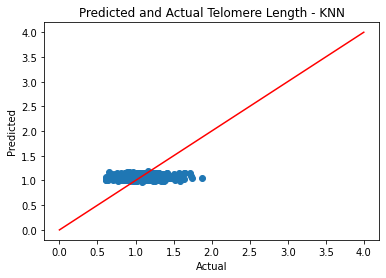

In [91]:
# Plot predicted values versus actual values
plt.scatter(y_test, y_pred_knn)
plt.plot([0,4], [0,4], linestyle='-', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted and Actual Telomere Length - KNN');

**DECISION TREE** with complete feature set

In [92]:
from sklearn.tree import DecisionTreeRegressor

# Step 1: Instantiating the model
dt = DecisionTreeRegressor(
    criterion='mse',
    splitter='best',
    max_features='auto'
)

# Step 2: Fitting the model 
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

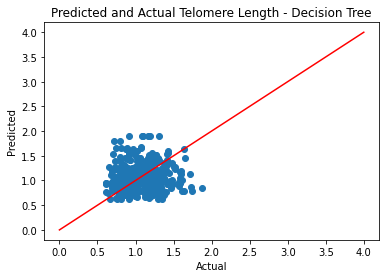

In [93]:
# Step 3: Making predictions
y_pred_dt = dt.predict(X_test)


# Plot predicted values versus actual values
plt.scatter(y_test, y_pred_dt)
plt.plot([0,4], [0,4], linestyle='-', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted and Actual Telomere Length - Decision Tree');

In [94]:
# Setting up variables for later comparison
dt_r2_train = dt.score(X_train, y_train)
dt_r2_test = dt.score(X_test, y_test)
dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_mse = mse(y_test, y_pred_dt)
dt_rmse = rmse(y_test, y_pred_dt)
dt_mape = np.mean(np.abs((y_test - y_pred_dt) / y_test) * 100)
dt_test_score = cross_val_score(dt, X_test, y_test, cv=5)

# Printing metrics
print("R-squared of the model on the training set is: {}".format(dt_r2_train))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(dt_r2_test))
print("Mean absolute error of the prediction is: {}".format(dt_mae))
print("Mean squared error of the prediction is: {}".format(dt_mse))
print("Root mean squared error of the prediction is: {}".format(dt_rmse))
print("Mean absolute percentage error of the prediction is: {}".format(dt_mape))

training_score = cross_val_score(dt, X_train, y_train, cv=5)
print("The training cross validation scores are: {}".format(training_score))
 
print("The test set cross validation scores are: {}".format(dt_test_score))

# This model also has a good training score. 

R-squared of the model on the training set is: 0.9999999922121174
-----Test set statistics-----
R-squared of the model on the test set is: -1.1732012528682882
Mean absolute error of the prediction is: 0.27936796229891303
Mean squared error of the prediction is: 0.12514915707027377
Root mean squared error of the prediction is: 0.35376426765612407
Mean absolute percentage error of the prediction is: 26.888574158805955
The training cross validation scores are: [-1.08022555 -0.78552006 -0.76419396 -0.90713414 -0.48674976]
The test set cross validation scores are: [-1.21617547 -0.75552791 -0.42838185 -0.38646786 -0.94777131]


In [95]:
# Interpreting how the model is making predictions
# Decision trees calculate the importance of features 
#(doesn't speak to directionality)
import_dt = pd.DataFrame(zip(X.columns, dt.feature_importances_, ),
                         columns=['Feature Names', 'Feature Importances'])
import_dt.sort_values('Feature Importances', ascending=False)

# In this model, features associated with age were determined to be most
# important for making the predictions. This makes sense because telomeres
# decrease with age.

,Feature Names,Feature Importances
109,RIDAGEMN,6.760180e-02
106,RIDEXMON,5.426208e-02
110,RIDAGEEX,5.082120e-02
152,CVDESVO2,3.708181e-02
85,PAQ050Q,3.625403e-02
131,CVXWRPE,3.453134e-02
111,RIDRETH1,3.349812e-02
90,PAD160,3.110978e-02
144,CVDR1SY,3.039184e-02
95,PAD460,2.936589e-02


**RANDOM FOREST** with complete feature set

In [96]:
from sklearn.ensemble import RandomForestRegressor

# Step 1: Instantiating the model
rf = RandomForestRegressor(random_state=42)

# Step 2: Fit the model
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

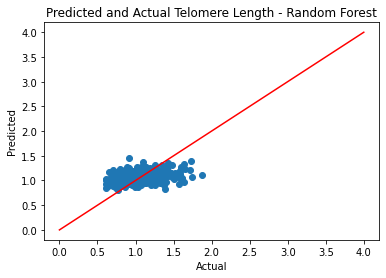

In [97]:
# Step 3: Make predictions
y_pred_rf = rf.predict(X_test)


# Plot predicted values versus actual values
plt.scatter(y_test, y_pred_rf)
plt.plot([0,4], [0,4], linestyle='-', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted and Actual Telomere Length - Random Forest');

In [98]:
# Setting up variables for later comparison
rf_r2_train = rf.score(X_train, y_train)
rf_r2_test = rf.score(X_test, y_test)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mse(y_test, y_pred_rf)
rf_rmse = rmse(y_test, y_pred_rf)
rf_mape = np.mean(np.abs((y_test - y_pred_rf) / y_test) * 100)
rf_test_score = cross_val_score(rf, X_test, y_test, cv=5)

# Printing metrics
print("R-squared of the model on the training set is: {}".format(rf_r2_train))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(rf_r2_test))
print("Mean absolute error of the prediction is: {}".format(rf_mae))
print("Mean squared error of the prediction is: {}".format(rf_mse))
print("Root mean squared error of the prediction is: {}".format(rf_rmse))
print("Mean absolute percentage error of the prediction is: {}".format(rf_mape))


training_score = cross_val_score(rf, X_train, y_train, cv=5)
print("The training cross validation scores are: {}".format(training_score))

print("The test set cross validation scores are: {}".format(rf_test_score))

# This is a decent training R squared score and the RMSE is 18%.

R-squared of the model on the training set is: 0.8659800047223101
-----Test set statistics-----
R-squared of the model on the test set is: 0.07833191858096755
Mean absolute error of the prediction is: 0.18615921173196834
Mean squared error of the prediction is: 0.05307653091766332
Root mean squared error of the prediction is: 0.23038344323684226
Mean absolute percentage error of the prediction is: 18.318748038779834
The training cross validation scores are: [ 0.00384675  0.0764292  -0.04699295  0.06468242  0.10005796]
The test set cross validation scores are: [-0.30133535  0.05370096 -0.00323967  0.09375726  0.00393689]


In [ ]:
# Interpreting how the model is making predictions

import_rf = pd.DataFrame(zip(X.columns, rf.feature_importances_, ),
                         columns=['Feature Names', 'Feature Importances'])
import_rf.sort_values('Feature Importances', ascending=False)

# Again, age features are the most important.

,Feature Names,Feature Importances
110,RIDAGEEX,6.128226e-02
109,RIDAGEMN,5.934034e-02
106,RIDEXMON,5.425272e-02
96,PAQ480,3.261462e-02
129,CVDEXLEN,3.137718e-02
89,PAD120,3.135183e-02
95,PAD460,2.656059e-02
90,PAD160,2.603129e-02
132,CVDWHR,2.469857e-02
91,PAQ180,2.339282e-02


**SVM MODEL** with complete feature set

In [99]:
from sklearn.svm import SVR
# No tuning at this point since this is a linear model, but seeing how this
# seeing how this model performs.

svr = SVR()
svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

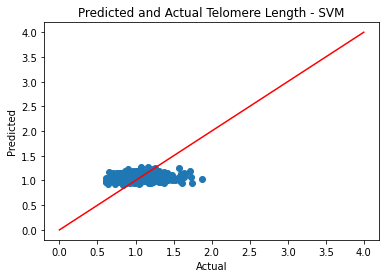

In [100]:
# Making predictions
y_pred_svr = svr.predict(X_test)


# Plot predicted values versus actual values
plt.scatter(y_test, y_pred_svr)
plt.plot([0,4], [0,4], linestyle='-', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted and Actual Telomere Length - SVM');


In [101]:
# Setting up variables for later comparison
svr_r2_train = svr.score(X_train, y_train)
svr_r2_test = svr.score(X_test, y_test)
svr_mae = mean_absolute_error(y_test, y_pred_svr)
svr_mse = mse(y_test, y_pred_svr)
svr_rmse = rmse(y_test, y_pred_svr)
svr_mape = np.mean(np.abs((y_test - y_pred_svr) / y_test) * 100)
svr_test_score = cross_val_score(svr, X_test, y_test, cv=5)

# Printing metrics
print("R-squared of the model on the training set is: {}".format(svr_r2_train))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(svr_r2_test))
print("Mean absolute error of the prediction is: {}".format(svr_mae))
print("Mean squared error of the prediction is: {}".format(svr_mse))
print("Root mean squared error of the prediction is: {}".format(svr_rmse))
print("Mean absolute percentage error of the prediction is: {}".format(svr_mape))


training_score = cross_val_score(svr, X_train, y_train, cv=5)
print("The training cross validation scores are: {}".format(training_score))

print("The test set cross validation scores are: {}".format(svr_test_score))

# As expected, this model is not fitting well and is performing similar to the
# other models that are sensitive to assumptions of linearity.

R-squared of the model on the training set is: 0.07889694415908333
-----Test set statistics-----
R-squared of the model on the test set is: -0.005203221879399145
Mean absolute error of the prediction is: 0.19315494833370855
Mean squared error of the prediction is: 0.05788710812516479
Root mean squared error of the prediction is: 0.24059739841728295
Mean absolute percentage error of the prediction is: 18.608730921195452
The training cross validation scores are: [-0.02165382  0.04802956 -0.0782067   0.03520813  0.0455046 ]
The test set cross validation scores are: [-0.1990945  -0.04527434 -0.03903176  0.05332317  0.00522214]


**GRADIENT BOOSTING** with complete feature set

In [102]:
from sklearn import ensemble

# Initialize and fit the model.
gbr = ensemble.GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

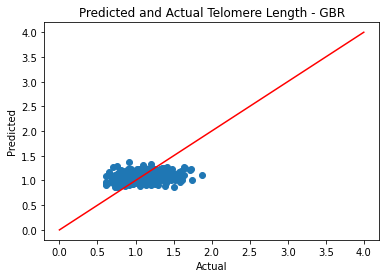

In [103]:
# Making predictions
y_pred_gbr = gbr.predict(X_test)


# Plot predicted values versus actual values
plt.scatter(y_test, y_pred_gbr)
plt.plot([0,4], [0,4], linestyle='-', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted and Actual Telomere Length - GBR');

In [104]:
# Setting up variables for later comparison
gbr_r2_train = gbr.score(X_train, y_train)
gbr_r2_test = gbr.score(X_test, y_test)
gbr_mae = mean_absolute_error(y_test, y_pred_gbr)
gbr_mse = mse(y_test, y_pred_gbr)
gbr_rmse = rmse(y_test, y_pred_gbr)
gbr_mape = np.mean(np.abs((y_test - y_pred_gbr) / y_test) * 100)
gbr_test_score = cross_val_score(gbr, X_test, y_test, cv=5)

# Printing metrics
print("R-squared of the model on the training set is: {}".format(gbr_r2_train))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(gbr_r2_test))
print("Mean absolute error of the prediction is: {}".format(gbr_mae))
print("Mean squared error of the prediction is: {}".format(gbr_mse))
print("Root mean squared error of the prediction is: {}".format(gbr_rmse))
print("Mean absolute percentage error of the prediction is: {}".format(gbr_mape))


training_score = cross_val_score(gbr, X_train, y_train, cv=5)
print("The training cross validation scores are: {}".format(training_score))

print("The test set cross validation scores are: {}".format(gbr_test_score))

# Model is intermediate in fit between the strictly linear models and the 
# better fitting models.

R-squared of the model on the training set is: 0.3937319757165723
-----Test set statistics-----
R-squared of the model on the test set is: 0.03789682024380947
Mean absolute error of the prediction is: 0.18944547225698302
Mean squared error of the prediction is: 0.05540508583924271
Root mean squared error of the prediction is: 0.2353828495010686
Mean absolute percentage error of the prediction is: 18.588954452900747
The training cross validation scores are: [ 0.0475773   0.06358179 -0.02648374  0.09120174  0.02676746]
The test set cross validation scores are: [-0.47254869 -0.0720937   0.03164328  0.02299312 -0.04239116]


# **Initial Model Comparisons**

In [107]:
# Setting up evaluation metrics so comparisons can be made
training_r2 = [lr_r2_train, ridge_r2_train, lasso_r2_train, enr_r2_train,
               knn_r2_train, dt_r2_train, rf_r2_train, svr_r2_train, gbr_r2_train]
mae = [lr_mae, ridge_mae, lasso_mae, enr_mae,
               knn_mae, dt_mae, rf_mae, svr_mae, gbr_mae]
mse = [lr_mse, ridge_mse, lasso_mse, enr_mse,
               knn_mse, dt_mse, rf_mse, svr_mse, gbr_mse]
rmse = [lr_rmse, ridge_rmse, lasso_rmse, enr_rmse,
               knn_rmse, dt_rmse, rf_rmse, svr_rmse, gbr_rmse]
mape = [lr_mape, ridge_mape, lasso_mape, enr_mape,
               knn_mape, dt_mape, rf_mape, svr_mape, gbr_mape]
model_names = ['OLS Regression', 'Ridge Regression', 'Lasso Regression',
               'ElasticNet Regression', 'K Nearest Neighbors', 'Decision Tree',
               'Random Forest', 'Support Vector', 'Gradient Boosting']

# Putting all of the metrics together
comparison = pd.DataFrame(zip(model_names, training_r2, mae, mse, rmse,
                              mape),
                           columns=['Model', 'Training R-squared Score', 
                                    'MAE', 'MSE', 'RMSE', 'MAPE'])

comparison

# The training R squared for the KNN and DT are very high and suspect. The RF
# training R squared looks reasonable. Of these three, the random forest has the
# lowest of the other metrics, so may be the best model to tune.

,Model,Training R-squared Score,MAE,MSE,RMSE,MAPE
0,OLS Regression,0.200420,0.195099,0.060282,0.245524,19.135288
1,Ridge Regression,0.167293,0.187128,0.054569,0.233599,18.363417
2,Lasso Regression,0.000000,0.197083,0.057665,0.240135,19.554895
3,ElasticNet Regression,0.000000,0.197083,0.057665,0.240135,19.554895
4,K Nearest Neighbors,1.000000,0.195011,0.057481,0.239752,19.215721
5,Decision Tree,1.000000,0.279368,0.125149,0.353764,26.888574
6,Random Forest,0.865980,0.186159,0.053077,0.230383,18.318748
7,Support Vector,0.078897,0.193155,0.057887,0.240597,18.608731
8,Gradient Boosting,0.393732,0.189445,0.055405,0.235383,18.588954


In [108]:
# Comparing raw cross validation scores
scores = [lr_test_score, ridge_test_score, lasso_test_score, enr_test_score,
               knn_test_score, dt_test_score, rf_test_score, svr_test_score, gbr_test_score]
score_model_names = ['OLS Regression', 'Ridge Regression', 'Lasso Regression',
               'ElasticNet Regression', 'K Nearest Neighbors', 'Decision Tree',
               'Random Forest', 'Support Vector', 'Gradient Boosting']

# Putting all of the metrics together
score_comparison = pd.DataFrame(zip(score_model_names, scores),
                           columns=['Model', 'Cross Val Scores'])

pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

score_comparison

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  del sys.path[0]


,Model,Cross Val Scores
0,OLS Regression,"[-1.6553868842270618, -2.255331309175655, -0.22425103911356237, -35.28614768345927, -0.2973379548053112]"
1,Ridge Regression,"[-0.09539487608776742, -0.04226826021792185, 0.008554869410727028, 0.017048788530553804, 0.043159466024165316]"
2,Lasso Regression,"[-0.010819177347021647, -0.008821227106808216, -0.007406413642885967, -0.019886373682601155, -0.0037571053639495755]"
3,ElasticNet Regression,"[-0.010974366774925137, -0.008821227106808216, -0.007406413642885967, -0.019886373682601155, -0.0037571053639495755]"
4,K Nearest Neighbors,"[0.6816832486800044, 0.6579263865364113, 0.6079661729852679, 0.5385341756118722, 0.7387660484149481]"
5,Decision Tree,"[-1.2161754745260902, -0.7555279114984181, -0.42838184779759075, -0.3864678618482942, -0.9477713068751942]"
6,Random Forest,"[-0.3013353509311454, 0.05370095820895659, -0.0032396726146795007, 0.09375726170890819, 0.003936892067295417]"
7,Support Vector,"[-0.19909450115765748, -0.04527434318738632, -0.039031760187036024, 0.053323171664388824, 0.005222140366872741]"
8,Gradient Boosting,"[-0.47254868653939863, -0.07209369669697407, 0.03164328425301621, 0.022993117517880024, -0.042391155076487046]"


In [113]:
# Mean of the cross val scores 
print('Mean cross validation score OLS Regression: {:.3f}'.format(np.mean(lr_test_score)))
print('Mean cross validation score Ridge Regression: {:.3f}'.format(np.mean(ridge_test_score)))
print('Mean cross validation score Lasso Regression: {:.3f}'.format(np.mean(lasso_test_score)))
print('Mean cross validation score ElasticNet: {:.3f}'.format(np.mean(enr_test_score)))
print('Mean cross validation score KNN: {:.3f}'.format(np.mean(knn_test_score)))
print('Mean cross validation score Decision Tree: {:.3f}'.format(np.mean(dt_test_score)))
print('Mean cross validation score Random Forest: {:.3f}'.format(np.mean(rf_test_score)))
print('Mean cross validation score Support Vector: {:.3f}'.format(np.mean(svr_test_score)))
print('Mean cross validation score Gradient Boosting: {:.3f}'.format(np.mean(gbr_test_score)))

# Measures are less than zero with the exception of KNN.

Mean cross validation score OLS Regression: -7.944
Mean cross validation score Ridge Regression: -0.014
Mean cross validation score Lasso Regression: -0.010
Mean cross validation score ElasticNet: -0.010
Mean cross validation score KNN: 0.645
Mean cross validation score Decision Tree: -0.747
Mean cross validation score Random Forest: -0.031
Mean cross validation score Support Vector: -0.045
Mean cross validation score Gradient Boosting: -0.106


# **Model Optimization**

Now I will reduce my feature set to reduce overfitting, and I will focus on optimizing selected models. The following features include the set from the correlation coefficient table and those deemed significant by the models.

In [114]:
columns = ['RIDEXMON', 'RIDAGEYR', 'RIDAGEMN', 'RIDAGEEX', 'RIDRETH1',
                   'PAQ540', 'CVDEXCL3', 'PAD080', 'CVDESVO2', 'PFQ060J',
                   'PFQ060I', 'PFQ060L', 'PFQ060M', 'PFQ060N', 'CVDS2SY',
                   'CVDFITLV', 'PFQ060D', 'PFQ050', 'CVXPARC', 'PFQ059', 
                   'PFQ020', 'PFD069BU', 'PFQ069GG', 'PFQ069KU', 'RIAGENDR',
                   'RIDPREG', 'HSQ590', 'CVQ220H', 'CVDS1TIM',
                   'PAD120', 'PAD160', 'PAQ480', 'CVDEXLEN', 'CVDR1DI']

X_2 = dataset_final[columns]

y_2 = dataset_final['winsorized_TELOMEAN']

In [115]:
# Splitting the data into training and test sets
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

print("The number of observations in the training set is {}".format(X_2_train.shape[0]))
print("The number of observations in the test set is {}".format(X_2_test.shape[0]))

The number of observations in the training set is 1469
The number of observations in the test set is 368


**KNN, Decision Tree, Random Forest** using Selected Features

In [116]:
knn = neighbors.KNeighborsRegressor(n_neighbors=100, weights='distance')
knn.fit(X_2_train, y_2_train)
y_2_pred_knn = knn.predict(X_2_test)

from sklearn.metrics import mean_squared_error

# Setting up variables for later comparison
knn_r2_train = knn.score(X_2_train, y_2_train)
knn_r2_test = knn.score(X_2_test, y_2_test)
knn_mae = mean_absolute_error(y_2_test, y_2_pred_knn)
knn_mse = mean_squared_error(y_2_test, y_2_pred_knn)
knn_rmse = np.sqrt(mean_squared_error(y_2_test, y_2_pred_knn))
knn_mape = np.mean(np.abs((y_2_test - y_2_pred_knn) / y_2_test) * 100)
knn_test_score = cross_val_score(knn, X_2_test, y_2_test, cv=5)


# Printing metrics
print("R-squared of the model on the training set is: {}".format(knn_r2_train))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(knn_r2_test))
print("Mean absolute error of the prediction is: {}".format(knn_mae))
print("Mean squared error of the prediction is: {}".format(knn_mse))
print("Root mean squared error of the prediction is: {}".format(knn_rmse))
print("Mean absolute percentage error of the prediction is: {}".format(knn_mape))


training_score = cross_val_score(knn, X_2_train, y_2_train, cv=5)
print("The training cross validation scores are: {}".format(training_score))

print("The test set cross validation scores are: {}".format(knn_test_score))

R-squared of the model on the training set is: 0.999969311499061
-----Test set statistics-----
R-squared of the model on the test set is: -0.007396022655534517
Mean absolute error of the prediction is: 0.19605844433200134
Mean squared error of the prediction is: 0.05801338596914917
Root mean squared error of the prediction is: 0.24085968107831823
Mean absolute percentage error of the prediction is: 19.308514519896143
The training cross validation scores are: [ 0.00710685  0.03009635 -0.01997783  0.03383633  0.02250411]
The test set cross validation scores are: [-0.11501076  0.01469763  0.03946594  0.06515991  0.06369511]


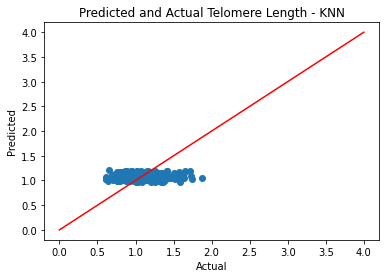

In [119]:
# Plot predicted values versus actual values
plt.scatter(y_2_test, y_2_pred_knn)
plt.plot([0,4], [0,4], linestyle='-', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted and Actual Telomere Length - KNN');

In [117]:
from sklearn.tree import DecisionTreeRegressor

# Step 1: Instantiating the model
dt = DecisionTreeRegressor(
    criterion='mse',
    splitter='best',
    max_features='auto'
)

# Step 2: Fitting the model 
dt.fit(X_2_train, y_2_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

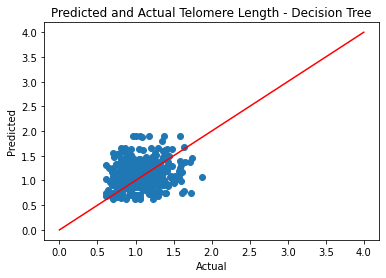

In [120]:
# Step 3: Making predictions
y_2_pred_dt = dt.predict(X_2_test)

# Plot predicted values versus actual values
plt.scatter(y_2_test, y_2_pred_dt)
plt.plot([0,4], [0,4], linestyle='-', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted and Actual Telomere Length - Decision Tree');

In [121]:
# Setting up variables for later comparison
dt_r2_train = dt.score(X_2_train, y_2_train)
dt_r2_test = dt.score(X_2_test, y_2_test)
dt_mae = mean_absolute_error(y_2_test, y_2_pred_dt)
dt_mse = mean_squared_error(y_2_test, y_2_pred_dt)
dt_rmse = np.sqrt(mean_squared_error(y_2_test, y_2_pred_dt))
dt_mape = np.mean(np.abs((y_2_test - y_2_pred_dt) / y_2_test) * 100)
dt_test_score = cross_val_score(dt, X_2_test, y_2_test, cv=5)


# Printing metrics
print("R-squared of the model on the training set is: {}".format(dt_r2_train))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(dt_r2_test))
print("Mean absolute error of the prediction is: {}".format(dt_mae))
print("Mean squared error of the prediction is: {}".format(dt_mse))
print("Root mean squared error of the prediction is: {}".format(dt_rmse))
print("Mean absolute percentage error of the prediction is: {}".format(dt_mape))

training_score = cross_val_score(dt, X_2_train, y_2_train, cv=5)
print("The training cross validation scores are: {}".format(training_score))
 
print("The test set cross validation scores are: {}".format(dt_test_score))

# Not good.

R-squared of the model on the training set is: 0.9999693036462036
-----Test set statistics-----
R-squared of the model on the test set is: -0.88002657089963
Mean absolute error of the prediction is: 0.25820758003532607
Mean squared error of the prediction is: 0.10826596952641544
Root mean squared error of the prediction is: 0.32903794542030473
Mean absolute percentage error of the prediction is: 25.253623124918683
The training cross validation scores are: [-1.12705542 -1.20347481 -1.10907509 -0.99938817 -0.92881713]
The test set cross validation scores are: [-1.63891174 -0.9482351  -0.57192543 -0.93640443 -1.48555433]


In [122]:
from sklearn.ensemble import RandomForestRegressor

# Step 1: Instantiating the model
rf = RandomForestRegressor(random_state=42)

# Step 2: Fit the model
rf.fit(X_2_train, y_2_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

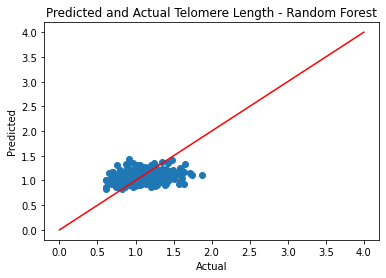

In [123]:
# Step 3: Make predictions
y_2_pred_rf = rf.predict(X_2_test)

# Plot predicted values versus actual values
plt.scatter(y_2_test, y_2_pred_rf)
plt.plot([0,4], [0,4], linestyle='-', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted and Actual Telomere Length - Random Forest');

In [124]:
# Setting up variables for later comparison
rf_r2_train = rf.score(X_2_train, y_2_train)
rf_r2_test = rf.score(X_2_test, y_2_test)
rf_mae = mean_absolute_error(y_2_test, y_2_pred_rf)
rf_mse = mean_squared_error(y_2_test, y_2_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_2_test, y_2_pred_rf))
rf_mape = np.mean(np.abs((y_2_test - y_2_pred_rf) / y_2_test) * 100)
rf_test_score = cross_val_score(rf, X_2_test, y_2_test, cv=5)

# Printing metrics
print("R-squared of the model on the training set is: {}".format(rf_r2_train))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(rf_r2_test))
print("Mean absolute error of the prediction is: {}".format(rf_mae))
print("Mean squared error of the prediction is: {}".format(rf_mse))
print("Root mean squared error of the prediction is: {}".format(rf_rmse))
print("Mean absolute percentage error of the prediction is: {}".format(rf_mape))


training_score = cross_val_score(rf, X_2_train, y_2_train, cv=5)
print("The training cross validation scores are: {}".format(training_score))

print("The test set cross validation scores are: {}".format(rf_test_score))

# Badly overfitting. Validation scores are the best so far.

R-squared of the model on the training set is: 0.8594908294924337
-----Test set statistics-----
R-squared of the model on the test set is: 0.03436201994707788
Mean absolute error of the prediction is: 0.1906416100918616
Mean squared error of the prediction is: 0.055608646037343945
Root mean squared error of the prediction is: 0.23581485542124767
Mean absolute percentage error of the prediction is: 18.685136233345073
The training cross validation scores are: [-0.02556527  0.01025377 -0.09772112  0.04691493  0.05512167]
The test set cross validation scores are: [-0.39071329 -0.00880174  0.02528243  0.05390896 -0.14763143]


In [126]:
# Setting up evaluation metrics so comparisons can be made
training_r2 = [knn_r2_train, dt_r2_train, rf_r2_train]
mae = [knn_mae, dt_mae, rf_mae]
mse = [knn_mse, dt_mse, rf_mse]
rmse = [knn_rmse, dt_rmse, rf_rmse]
mape = [knn_mape, dt_mape, rf_mape]
model_names = ['K Nearest Neighbors', 'Decision Tree',
               'Random Forest']

# Putting all of the metrics together
comparison = pd.DataFrame(zip(model_names, training_r2, mae, mse, rmse,
                              mape),
                           columns=['Model', 'Training R-squared Score', 
                                    'MAE', 'MSE', 'RMSE', 'MAPE'])

comparison

# The random forest and KNN perform slightly better using the full set of data,
# but the difference is minimal. The decision tree is better with the reduced
# set. Because the MAPE is lowest for the random forest, I will attempt
# further optimization of this model using hyperparameter tuning.  

,Model,Training R-squared Score,MAE,MSE,RMSE,MAPE
0,K Nearest Neighbors,0.999969,0.196058,0.058013,0.240860,19.308515
1,Decision Tree,0.999969,0.258208,0.108266,0.329038,25.253623
2,Random Forest,0.859491,0.190642,0.055609,0.235815,18.685136


In [127]:
# Cross-validation score comparison for the three models with selected feature
# set.

print('Mean cross validation score KNN: {:.3f}'.format(np.mean(knn_test_score)))
print('Mean cross validation score Decision Tree: {:.3f}'.format(np.mean(dt_test_score)))
print('Mean cross validation score Random Forest: {:.3f}'.format(np.mean(rf_test_score)))

Mean cross validation score KNN: 0.014
Mean cross validation score Decision Tree: -1.116
Mean cross validation score Random Forest: -0.094


In [134]:
# I will attempt to optimize the random forest model further using a grid search.

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in the forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 200, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [1, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [10, 64, 118, 173, 227, 282, 336, 391, 445, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 29, 48, 67, 86, 105, 124, 143, 162, 181, 200, None], 'min_samples_split': [1, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [135]:
# Using the random grid to search for best hyperparameters

# Creating the base model to tune
rf = RandomForestRegressor()

# Random search of parameters, using five fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [136]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 227}

In [155]:
# Step 1: Instantiating the model
rf = RandomForestRegressor(bootstrap=True,
 max_depth=25,
 max_features='auto',
 min_samples_leaf=1,
 min_samples_split=5,
 n_estimators=227,
 random_state=42)

# Step 2: Fit the model
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=25, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=227, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

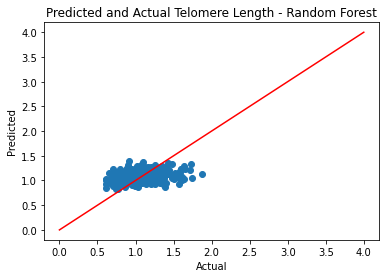

In [156]:
# Step 3: Make predictions
y_2_pred_rf = rf.predict(X_test)

# Plot predicted values versus actual values
plt.scatter(y_test, y_2_pred_rf)
plt.plot([0,4], [0,4], linestyle='-', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted and Actual Telomere Length - Random Forest');

In [158]:
# Looking at metrics

rf_r2_train = rf.score(X_train, y_train)
rf_mae = mean_absolute_error(y_test, y_2_pred_rf)
rf_mse = mean_squared_error(y_test, y_2_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_2_pred_rf))
rf_mape = np.mean(np.abs((y_test - y_2_pred_rf) / y_test) * 100)
rf_test_score = cross_val_score(rf, X_test, y_test, cv=5)

# Printing metrics
print("R-squared of the model on the training set is: {}".format(rf_r2_train))
print("-----Test set statistics-----")
print("Mean absolute error of the prediction is: {}".format(rf_mae))
# print("Mean squared error of the prediction is: {}".format(rf_mse))
# print("Root mean squared error of the prediction is: {}".format(rf_rmse))
print("Mean absolute percentage error of the prediction is: {}".format(rf_mape))


print("The test set cross validation scores are: {}".format(rf_test_score))

print('Mean cross validation score Random Forest: {:.3f}'.format(np.mean(rf_test_score)))

# No additional improvements were been made by tuning the hyperparameters.

R-squared of the model on the training set is: 0.821415392834433
-----Test set statistics-----
Mean absolute error of the prediction is: 0.18674475077177763
Mean absolute percentage error of the prediction is: 18.421095934513755
The test set cross validation scores are: [-0.30271722  0.06383801  0.00469649  0.07806273 -0.01384166]
Mean cross validation score Random Forest: -0.034


In [160]:
# Feature importance

importance_rf = pd.DataFrame(zip(X.columns, rf.feature_importances_, ),
                         columns=['Feature Names', 'Feature Importances'])
importance_rf.sort_values('Feature Importances', ascending=False)


# Most important variables were Age in Months (first two variables), the six
# month period when the exam was performed, daily hours of TV/computer use, 
# length of the fitness exam, moderate activity in the last 30 days, muscle
# strengthening activities last 30 days, how long moderate activities each
# bout, warm up heart rate.


,Feature Names,Feature Importances
109,RIDAGEMN,6.397711e-02
110,RIDAGEEX,6.393410e-02
106,RIDEXMON,5.826415e-02
96,PAQ480,3.177140e-02
129,CVDEXLEN,3.079365e-02
89,PAD120,3.069970e-02
95,PAD460,2.731744e-02
90,PAD160,2.549933e-02
132,CVDWHR,2.523923e-02
91,PAQ180,2.383669e-02


Feature ranking:
1. feature 109 (0.063977)
2. feature 110 (0.063934)
3. feature 106 (0.058264)
4. feature 96 (0.031771)
5. feature 129 (0.030794)
6. feature 89 (0.030700)
7. feature 95 (0.027317)
8. feature 90 (0.025499)
9. feature 132 (0.025239)
10. feature 91 (0.023837)
11. feature 144 (0.023612)
12. feature 111 (0.022633)
13. feature 147 (0.022205)
14. feature 152 (0.021642)
15. feature 87 (0.021378)
16. feature 148 (0.021015)
17. feature 85 (0.020123)
18. feature 131 (0.018453)
19. feature 98 (0.018423)
20. feature 112 (0.017842)
21. feature 140 (0.017681)
22. feature 136 (0.016611)
23. feature 145 (0.016135)
24. feature 97 (0.015892)
25. feature 108 (0.015071)
26. feature 137 (0.014134)
27. feature 141 (0.014131)
28. feature 142 (0.013794)
29. feature 143 (0.013753)
30. feature 120 (0.013257)
31. feature 115 (0.012570)
32. feature 130 (0.012448)
33. feature 122 (0.012412)
34. feature 135 (0.012241)
35. feature 99 (0.011742)
36. feature 151 (0.011011)
37. feature 93 (0.010981)
38. 

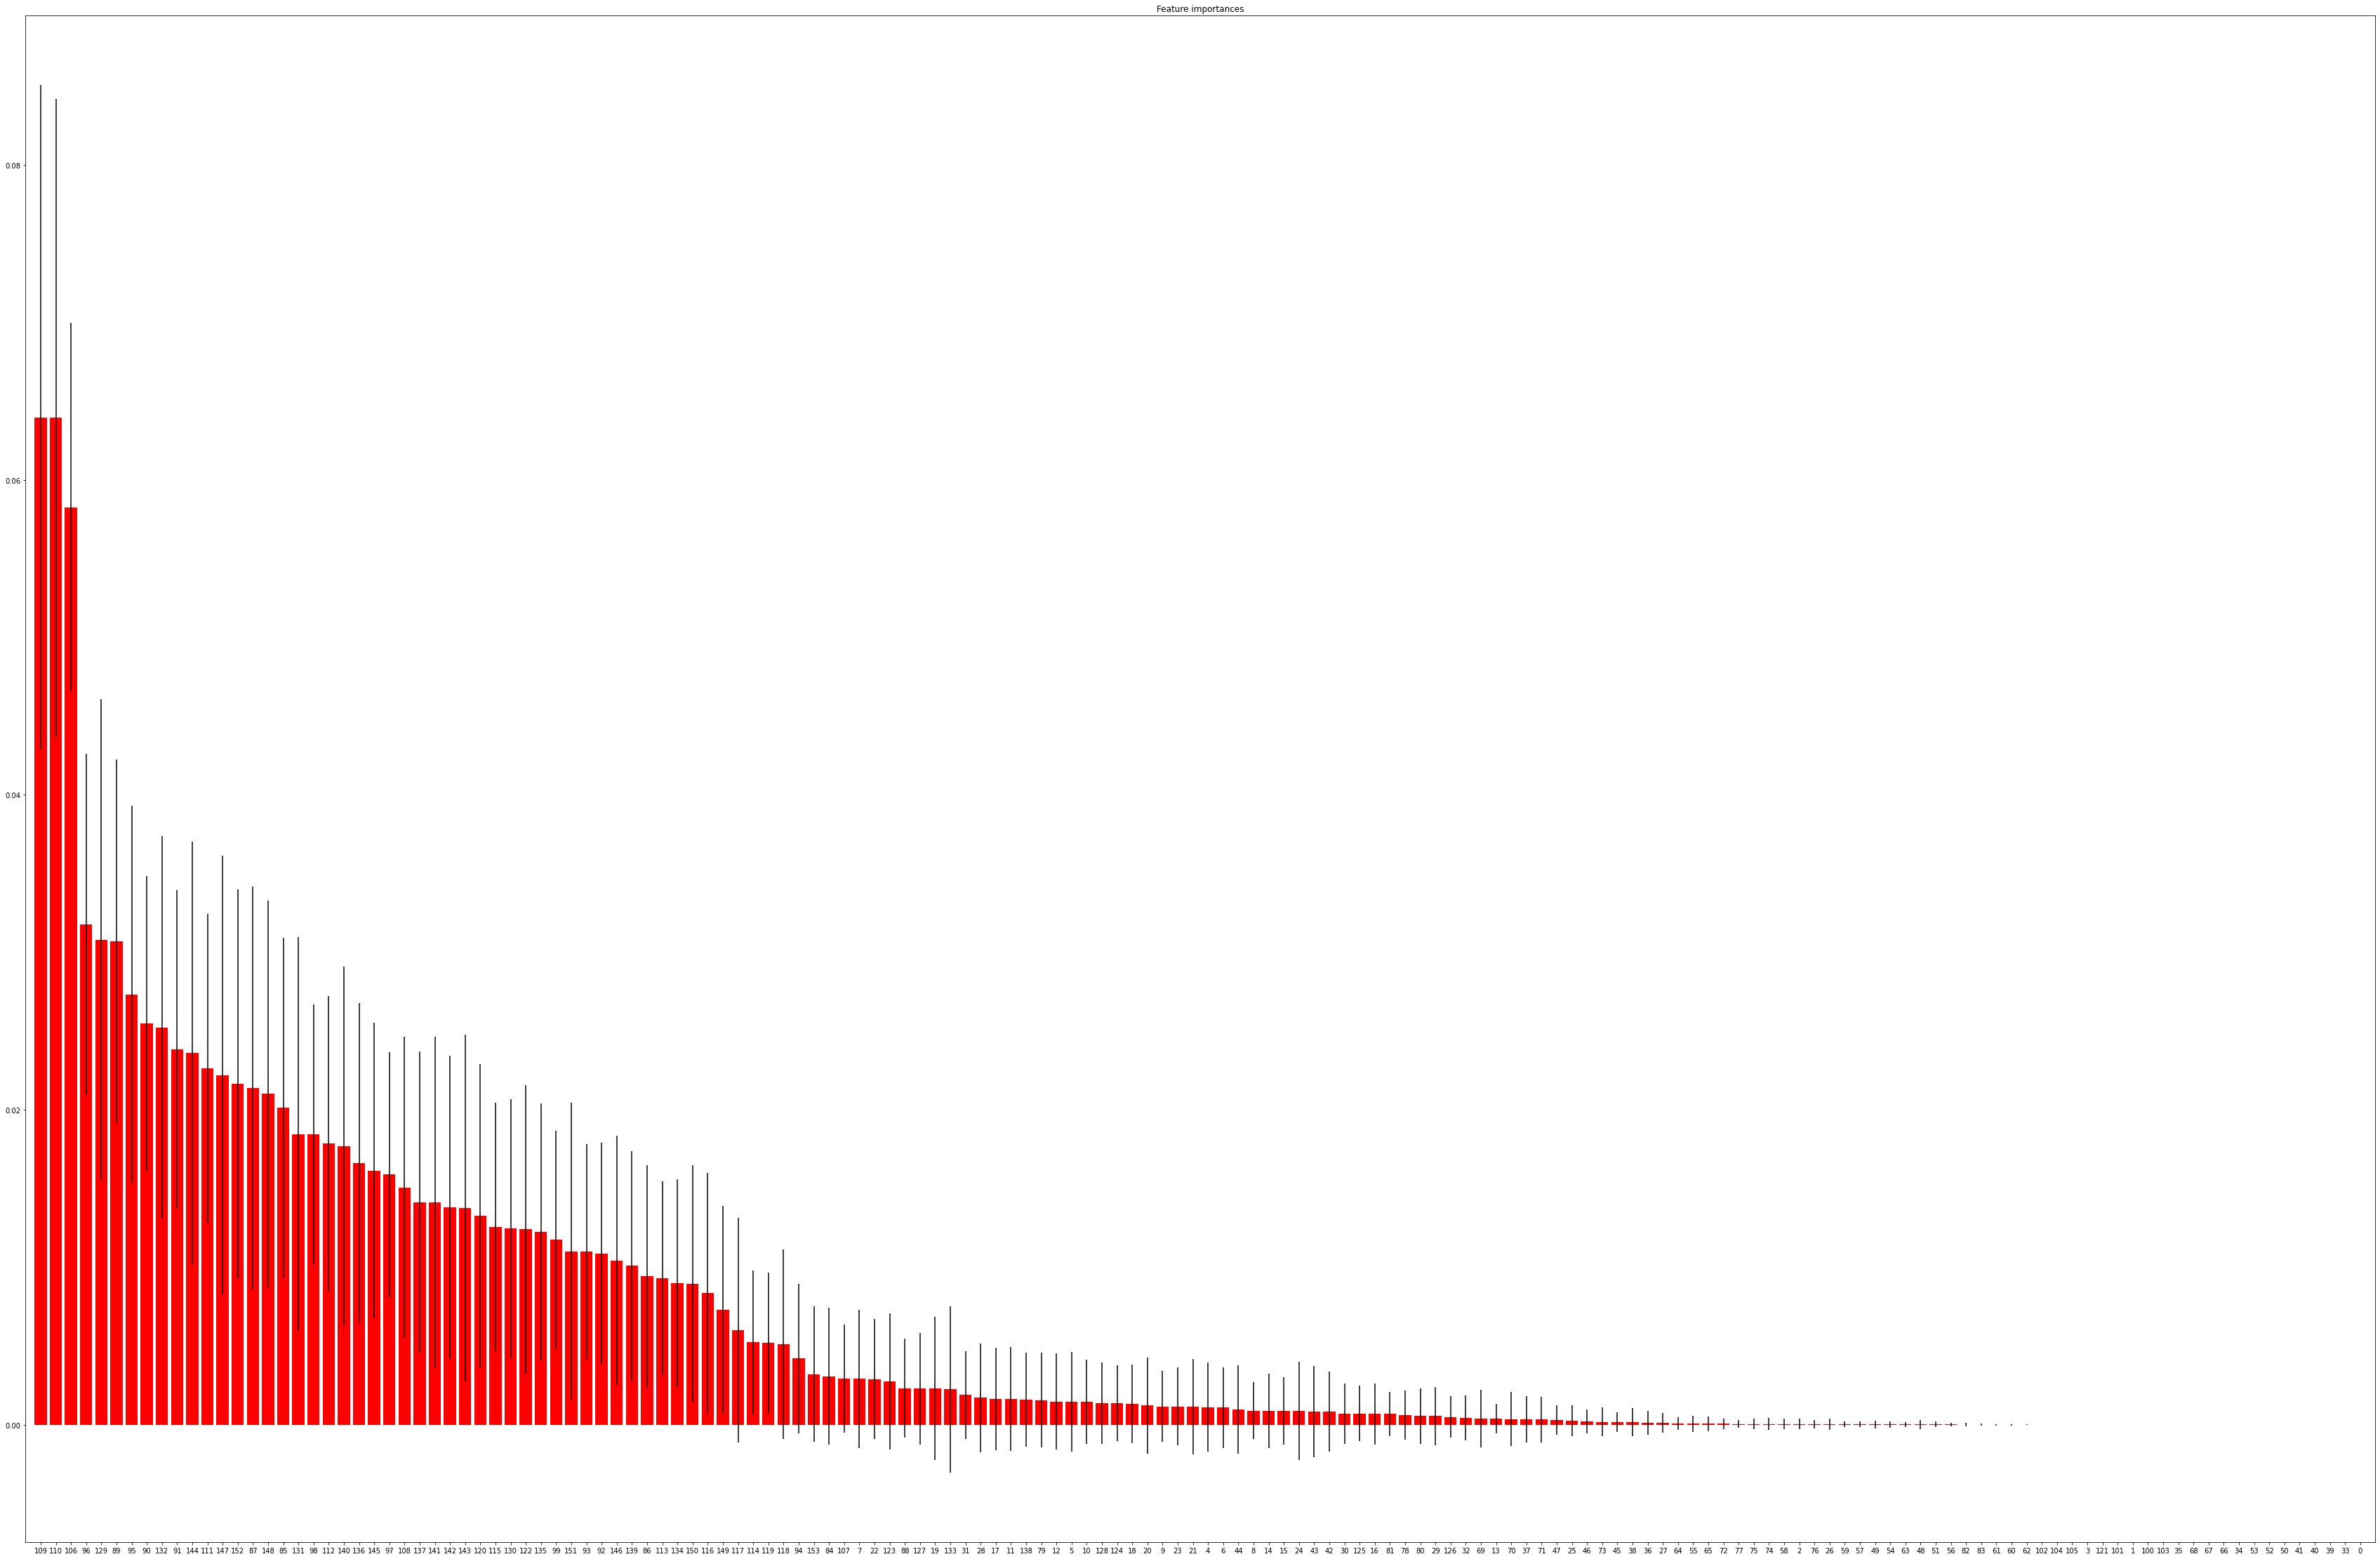

In [168]:
# Graphical representation of feature importances. The top three features were
# the most informative.
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html 

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(60,40))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()